In [1]:
%ls
%cd ..

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 067D-FB3E

 C:\Users\Dongmin Kim\Documents\OnlineTSAD\figures 디렉터리

2023-05-11  오후 04:24    <DIR>          .
2023-05-11  오후 04:24    <DIR>          ..
2023-05-11  오후 04:24    <DIR>          .ipynb_checkpoints
2023-05-10  오후 02:46        19,128,714 Distribution_shift.ipynb
2023-05-05  오후 12:33         1,670,221 Distribution_shift_quantify_gaussian.ipynb
2023-05-09  오후 07:37         3,790,840 Distribution_shift_quantify_gaussian_datasearch.ipynb
2023-05-02  오후 05:48         2,075,311 Distribution_shift_visualize.ipynb
2023-04-27  오후 09:27           346,353 evt_logfit.ipynb
2023-04-29  오후 02:18         2,810,531 NTS_UNI_Trend_New_Normal.ipynb
2023-05-11  오후 12:20         3,386,765 onoff_comparison.ipynb
2023-05-09  오후 07:30    <DIR>          PCA
2023-05-10  오후 02:44         2,344,870 SWaT_(main_figure).ipynb
2023-05-04  오후 08:23    <DIR>          tmp
2023-05-09  오후 06:27    <DIR>          TSNE
               8개 파일          35,553,605 바이트
               6

In [2]:
import numpy as np
import matplotlib as mat
from matplotlib import font_manager, rc

def setPlotStyle():    
    #mat.rcParams['font.family'] = "serif"
    #mat.rcParams['font.serif'] = ["Arial"]
    mat.rcParams['font.family'] = "sans-serif"
    mat.rcParams['font.sans-serif'] = "Times new roman"
    mat.rcParams["axes.titlesize"] = "x-large"
    mat.rcParams['font.size'] = 15
    mat.rcParams['legend.fontsize'] = 15
    mat.rcParams['lines.linewidth'] = 2
    mat.rcParams['lines.color'] = 'r'
    mat.rcParams['axes.grid'] = 1     
    mat.rcParams['axes.xmargin'] = 0.1     
    mat.rcParams['axes.ymargin'] = 0.1     
    mat.rcParams["mathtext.fontset"] = "dejavuserif" #"cm", "stix", etc.
    mat.rcParams['figure.dpi'] = 500
    mat.rcParams['savefig.dpi'] = 500
setPlotStyle()

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

print(is_float('1.23'))
print(is_float('123'))
print(is_float('1.23a')) 

True
True
False


In [5]:
def subresult(path, keyword):
    print(f"{path} | {keyword}")
    arr = []
    for file in os.listdir(path):
        if keyword in file and file[0] != '_':
            print(file)
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            arr.append(df)
    arr = pd.concat(arr)
    
    index = arr.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    arr = arr[not_duplicate]
    
    qidx = arr.index.map(lambda x: is_float(x[1:]))
    arr_q = arr[qidx]
    
    arr_q = arr_q.sort_index(key=lambda x: list(map(lambda a: float(a[1:]), x)))
    
    return arr_q.index.map(lambda x: float(x[1:])), arr_q["F1"].values

In [6]:
def savedf(path, keyword):
    print(f"{path} | {keyword}")
    arr = []
    for file in os.listdir(path):
        if keyword in file and file[0] != '_':
            print(file)
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            arr.append(df)
    arr = pd.concat(arr)
    
    index = arr.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    arr = arr[not_duplicate]
    
    qidx = arr.index.map(lambda x: is_float(x[1:]))
    arr_q = arr[qidx]
    arr_other = arr[~qidx]
    
    arr_q = arr_q.sort_index(key=lambda x: list(map(lambda a: float(a[1:]), x)))
    
    final_arr = pd.concat([arr_q, arr_other])
    final_arr.to_csv(os.path.join(f"{path}", f"_{keyword}"))

results\MLP_SWaT_normalization_None | offline_all_0
MLP_SWaT_normalization_None_offline_all_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_SWaT_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_None | offline_all_0
MLP_SWaT_normalization_None_offline_all_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_SWaT_normalization_None_offline_all_0.9_1.0_0.01.csv


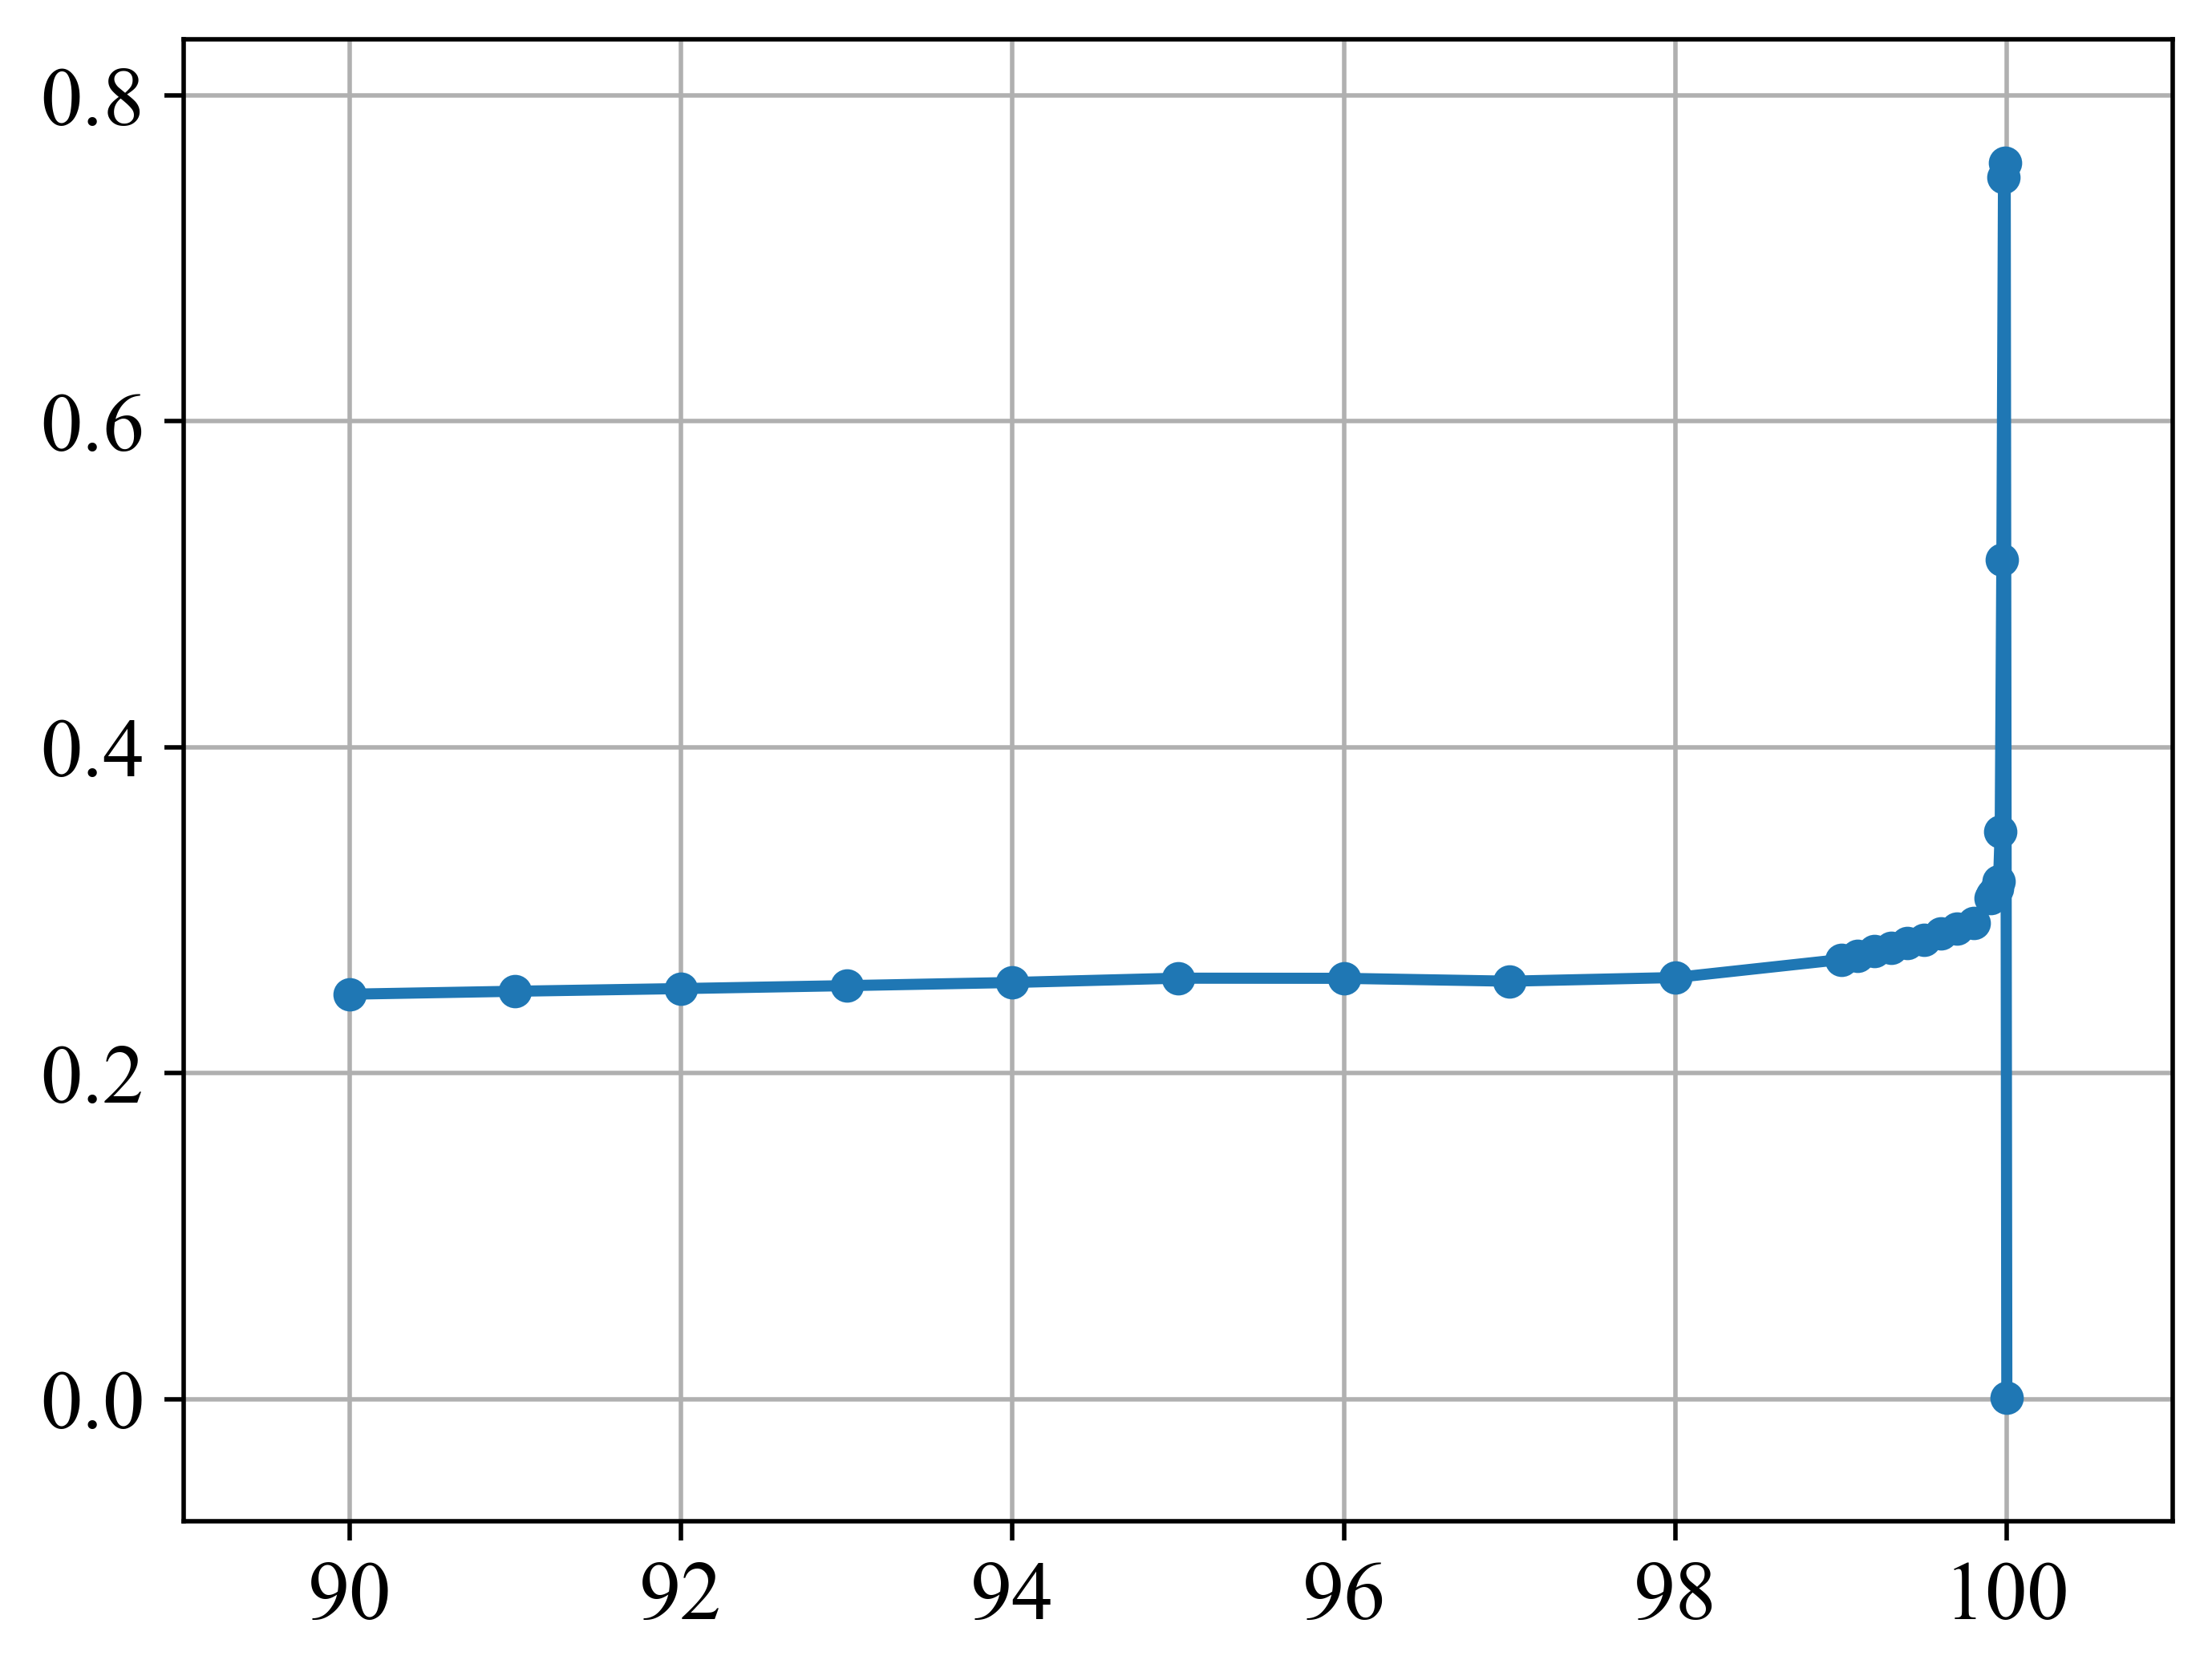

In [7]:
model = "MLP"
d = "SWaT"
ms = 3
savedf(os.path.join("results", f"MLP_{d}_normalization_None"), "offline_all_0")
q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_None"), "offline_all_0")
plt.plot(q, f1, '-o', label="offline", markersize=ms+2)

results\MLP_SWaT_normalization_None | offline_all_0
MLP_SWaT_normalization_None_offline_all_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_SWaT_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_None | offline_all_0
MLP_SWaT_normalization_None_offline_all_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_SWaT_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_Detrend | offline_detrend_all_0
MLP_SWaT_normalization_Detrend_offline_detrend_all_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_Detrend_offline_detrend_all_0.99_1.0_0.001.csv
MLP_SWaT_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_Detrend | offline_detrend_all_0
MLP_SWaT_normalization_Detrend_offline_detrend_all_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_Detrend_offline_detrend_all_0.99_1.0_0.001.csv
MLP_SWaT_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.

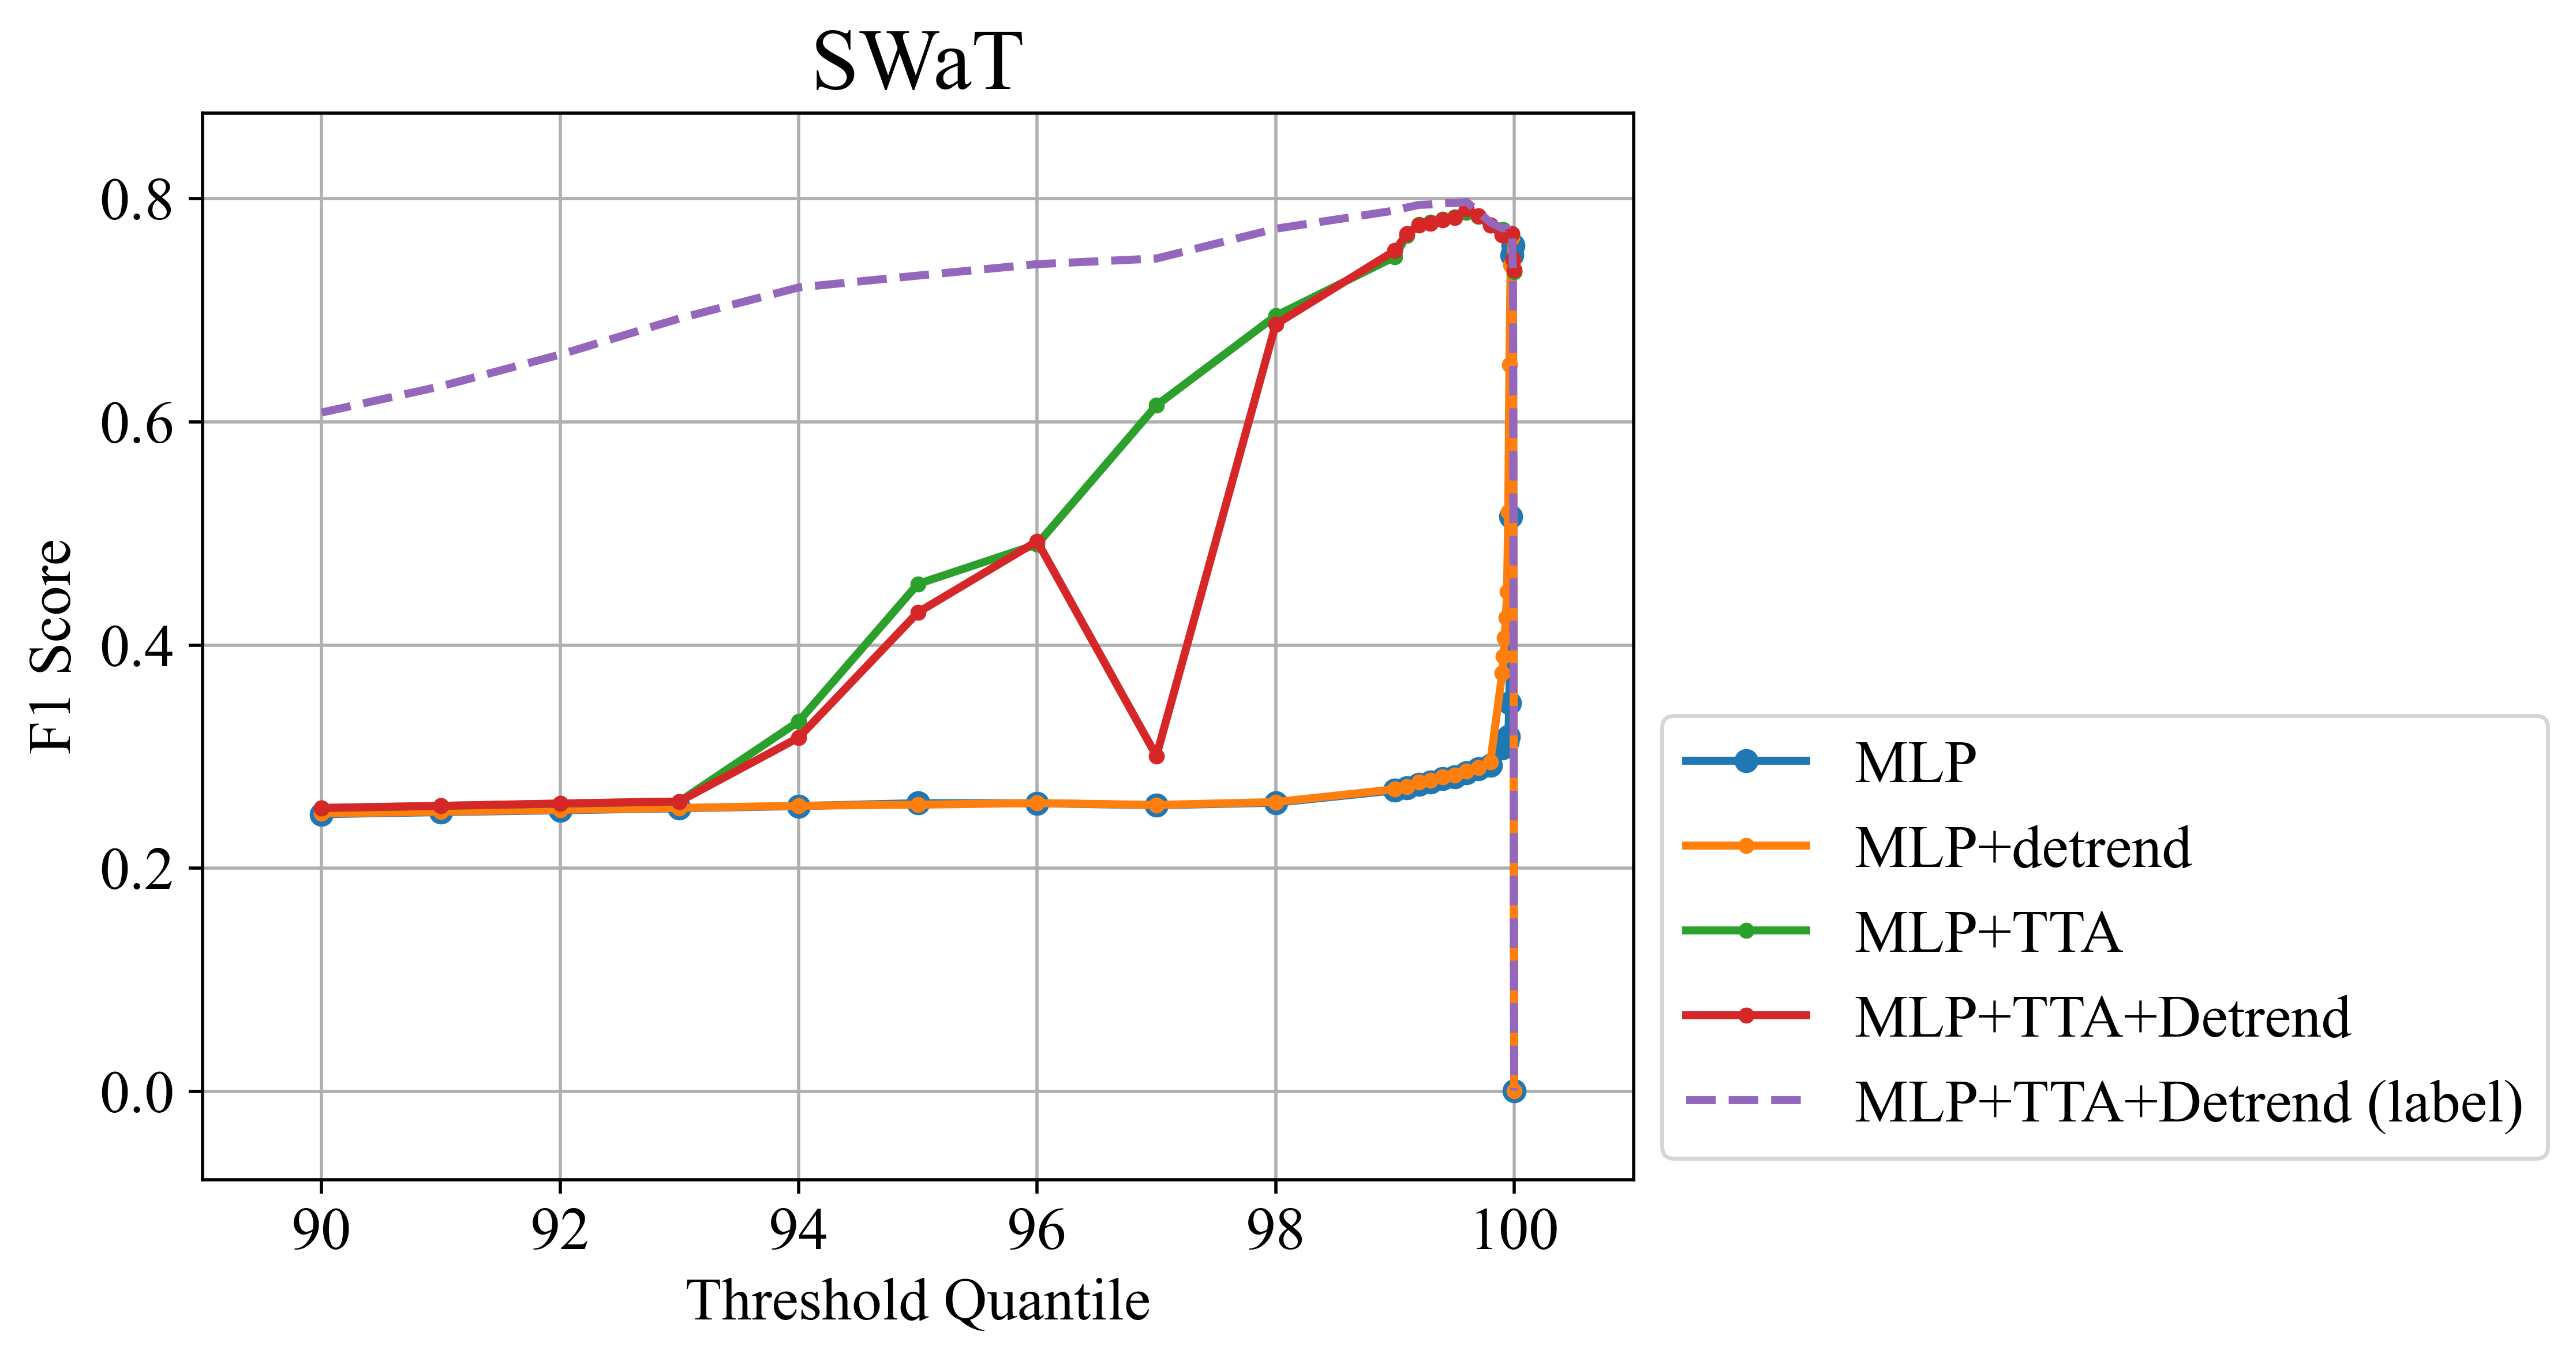

results\MLP_SMD_machine-1-4_normalization_None | offline_all_0
MLP_SMD_machine-1-4_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SMD_machine-1-4_normalization_None | offline_all_0
MLP_SMD_machine-1-4_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SMD_machine-1-4_normalization_Detrend | offline_detrend_all_0
MLP_SMD_machine-1-4_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SMD_machine-1-4_normalization_Detrend | offline_detrend_all_0
MLP_SMD_machine-1-4_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SMD_machine-1-4_normalization_None | None_online_all_0
MLP_SMD_machine-1-4_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_SMD_machine-1-4_normalization_None | None_online_all_0
MLP_SMD_machine-1-4_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_SMD_machine-1-4_normalization_Detrend | Detrend_online_all_0
MLP_SMD_machine-1-4_normalization_Detrend_online_all_0.9_1.0_0.01.csv
results\MLP_SMD_machi

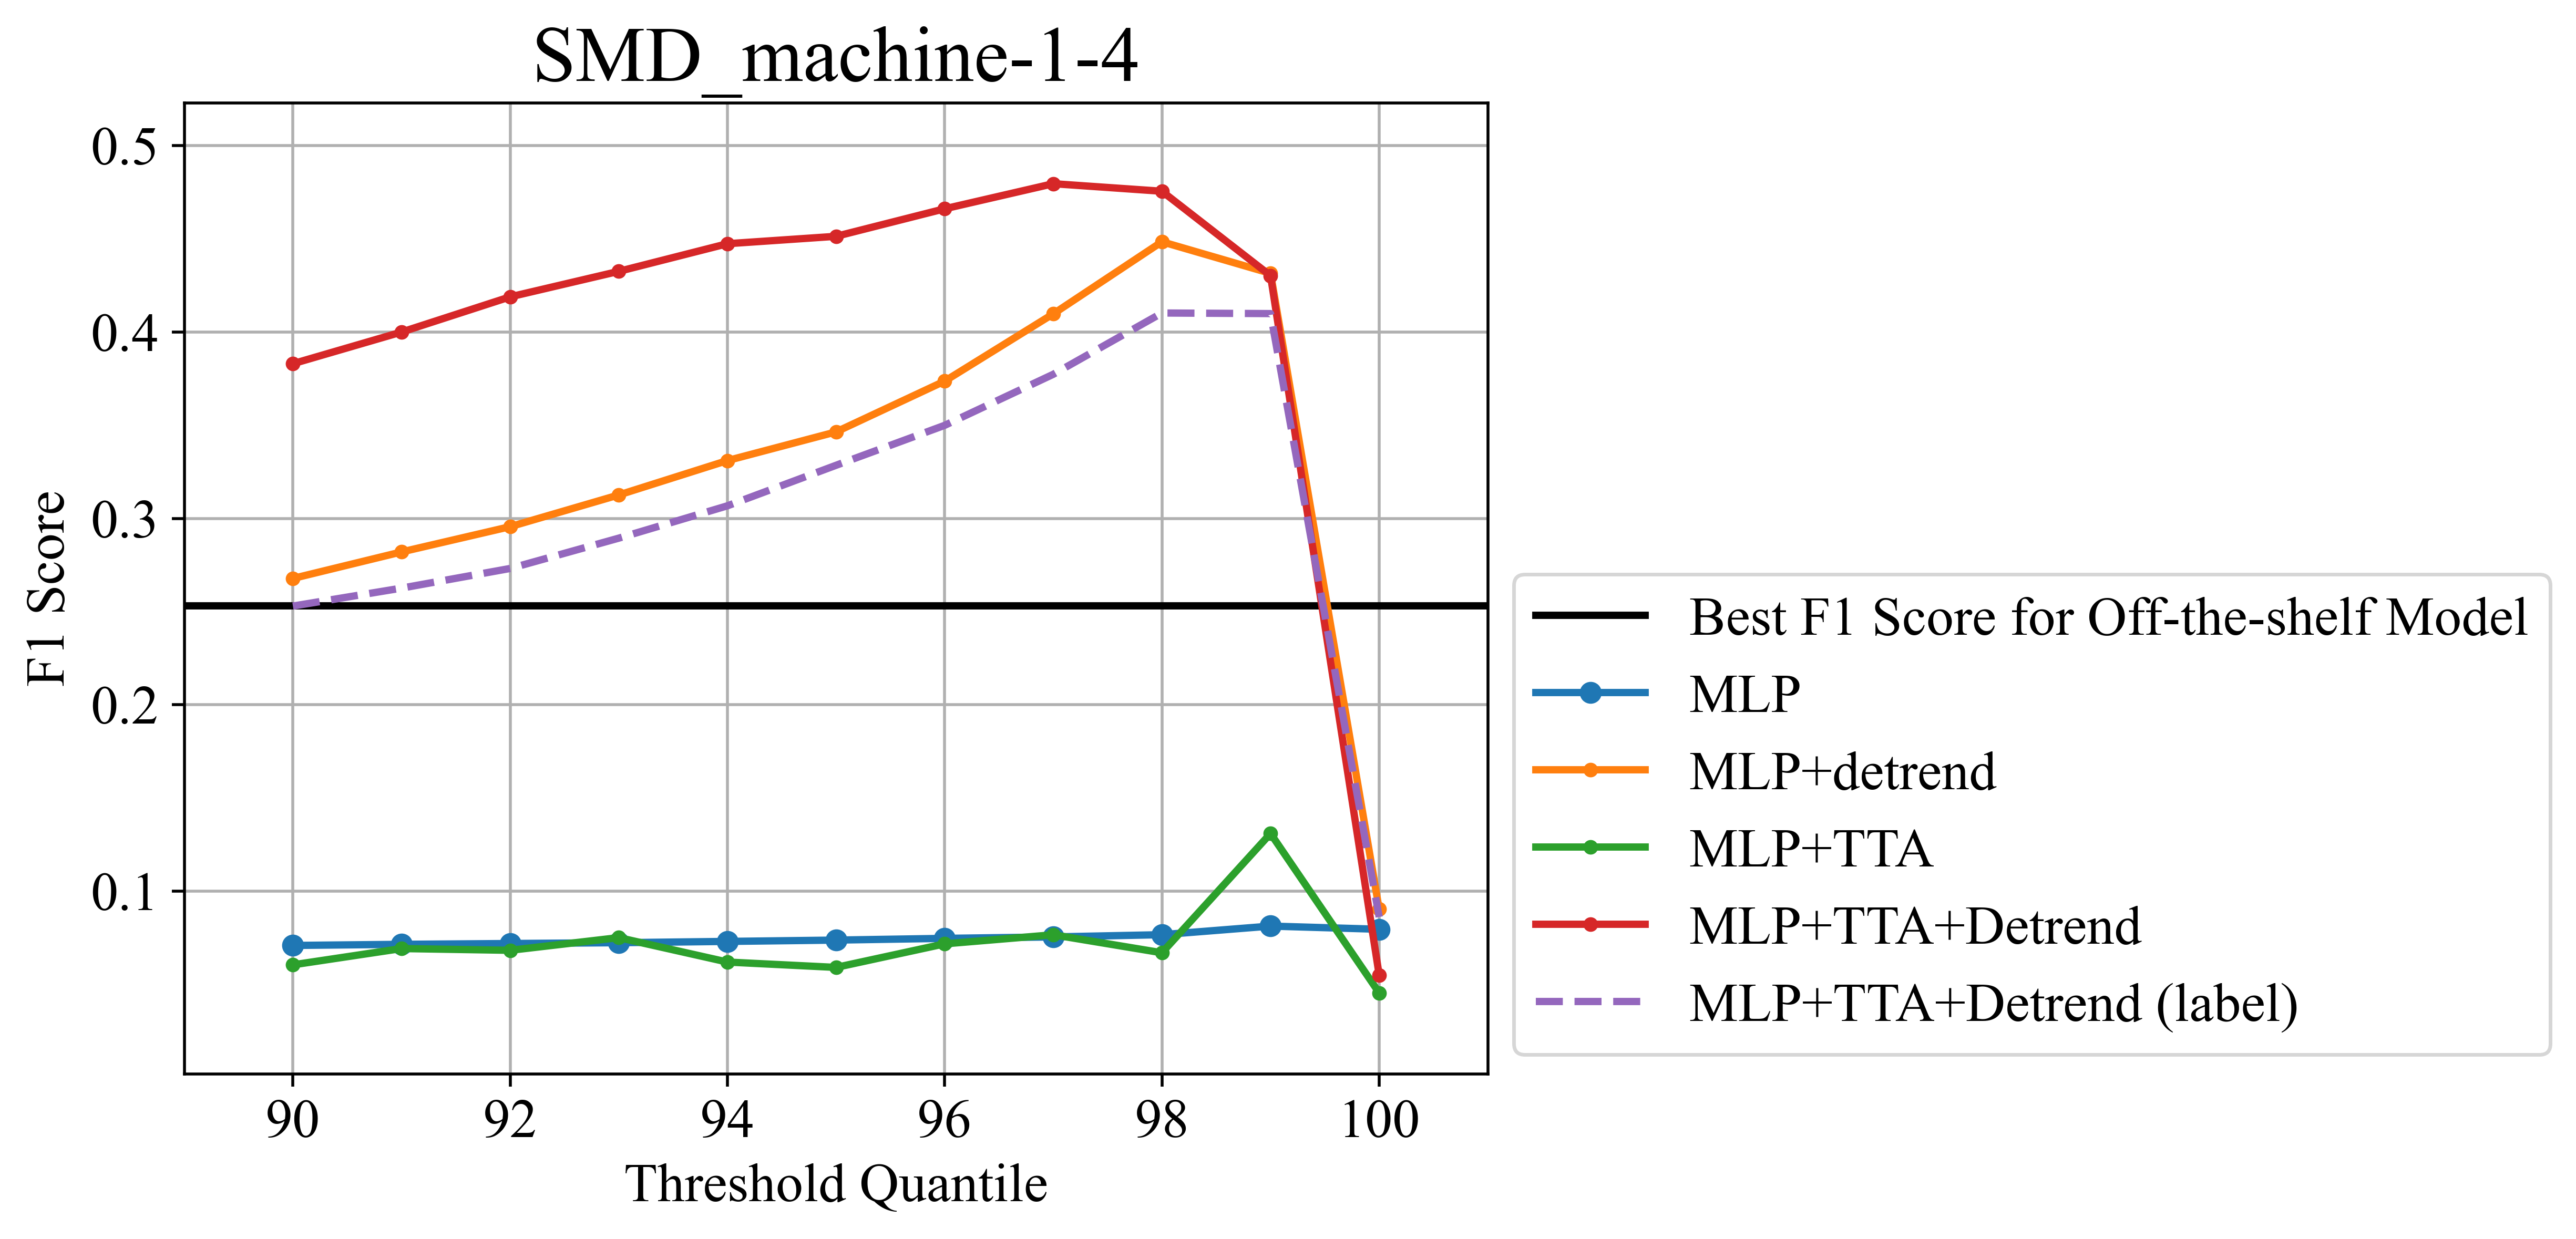

results\MLP_MSL_P-15_normalization_None | offline_all_0
MLP_MSL_P-15_normalization_None_offline_all_0.996_0.997_0.0001.csv
MLP_MSL_P-15_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_MSL_P-15_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_None | offline_all_0
MLP_MSL_P-15_normalization_None_offline_all_0.996_0.997_0.0001.csv
MLP_MSL_P-15_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_MSL_P-15_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_Detrend | offline_detrend_all_0
MLP_MSL_P-15_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_Detrend | offline_detrend_all_0
MLP_MSL_P-15_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_None | None_online_all_0
MLP_MSL_P-15_normalization_None_online_all_0.98_1.0_0.001.csv
MLP_MSL_P-15_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_None | None

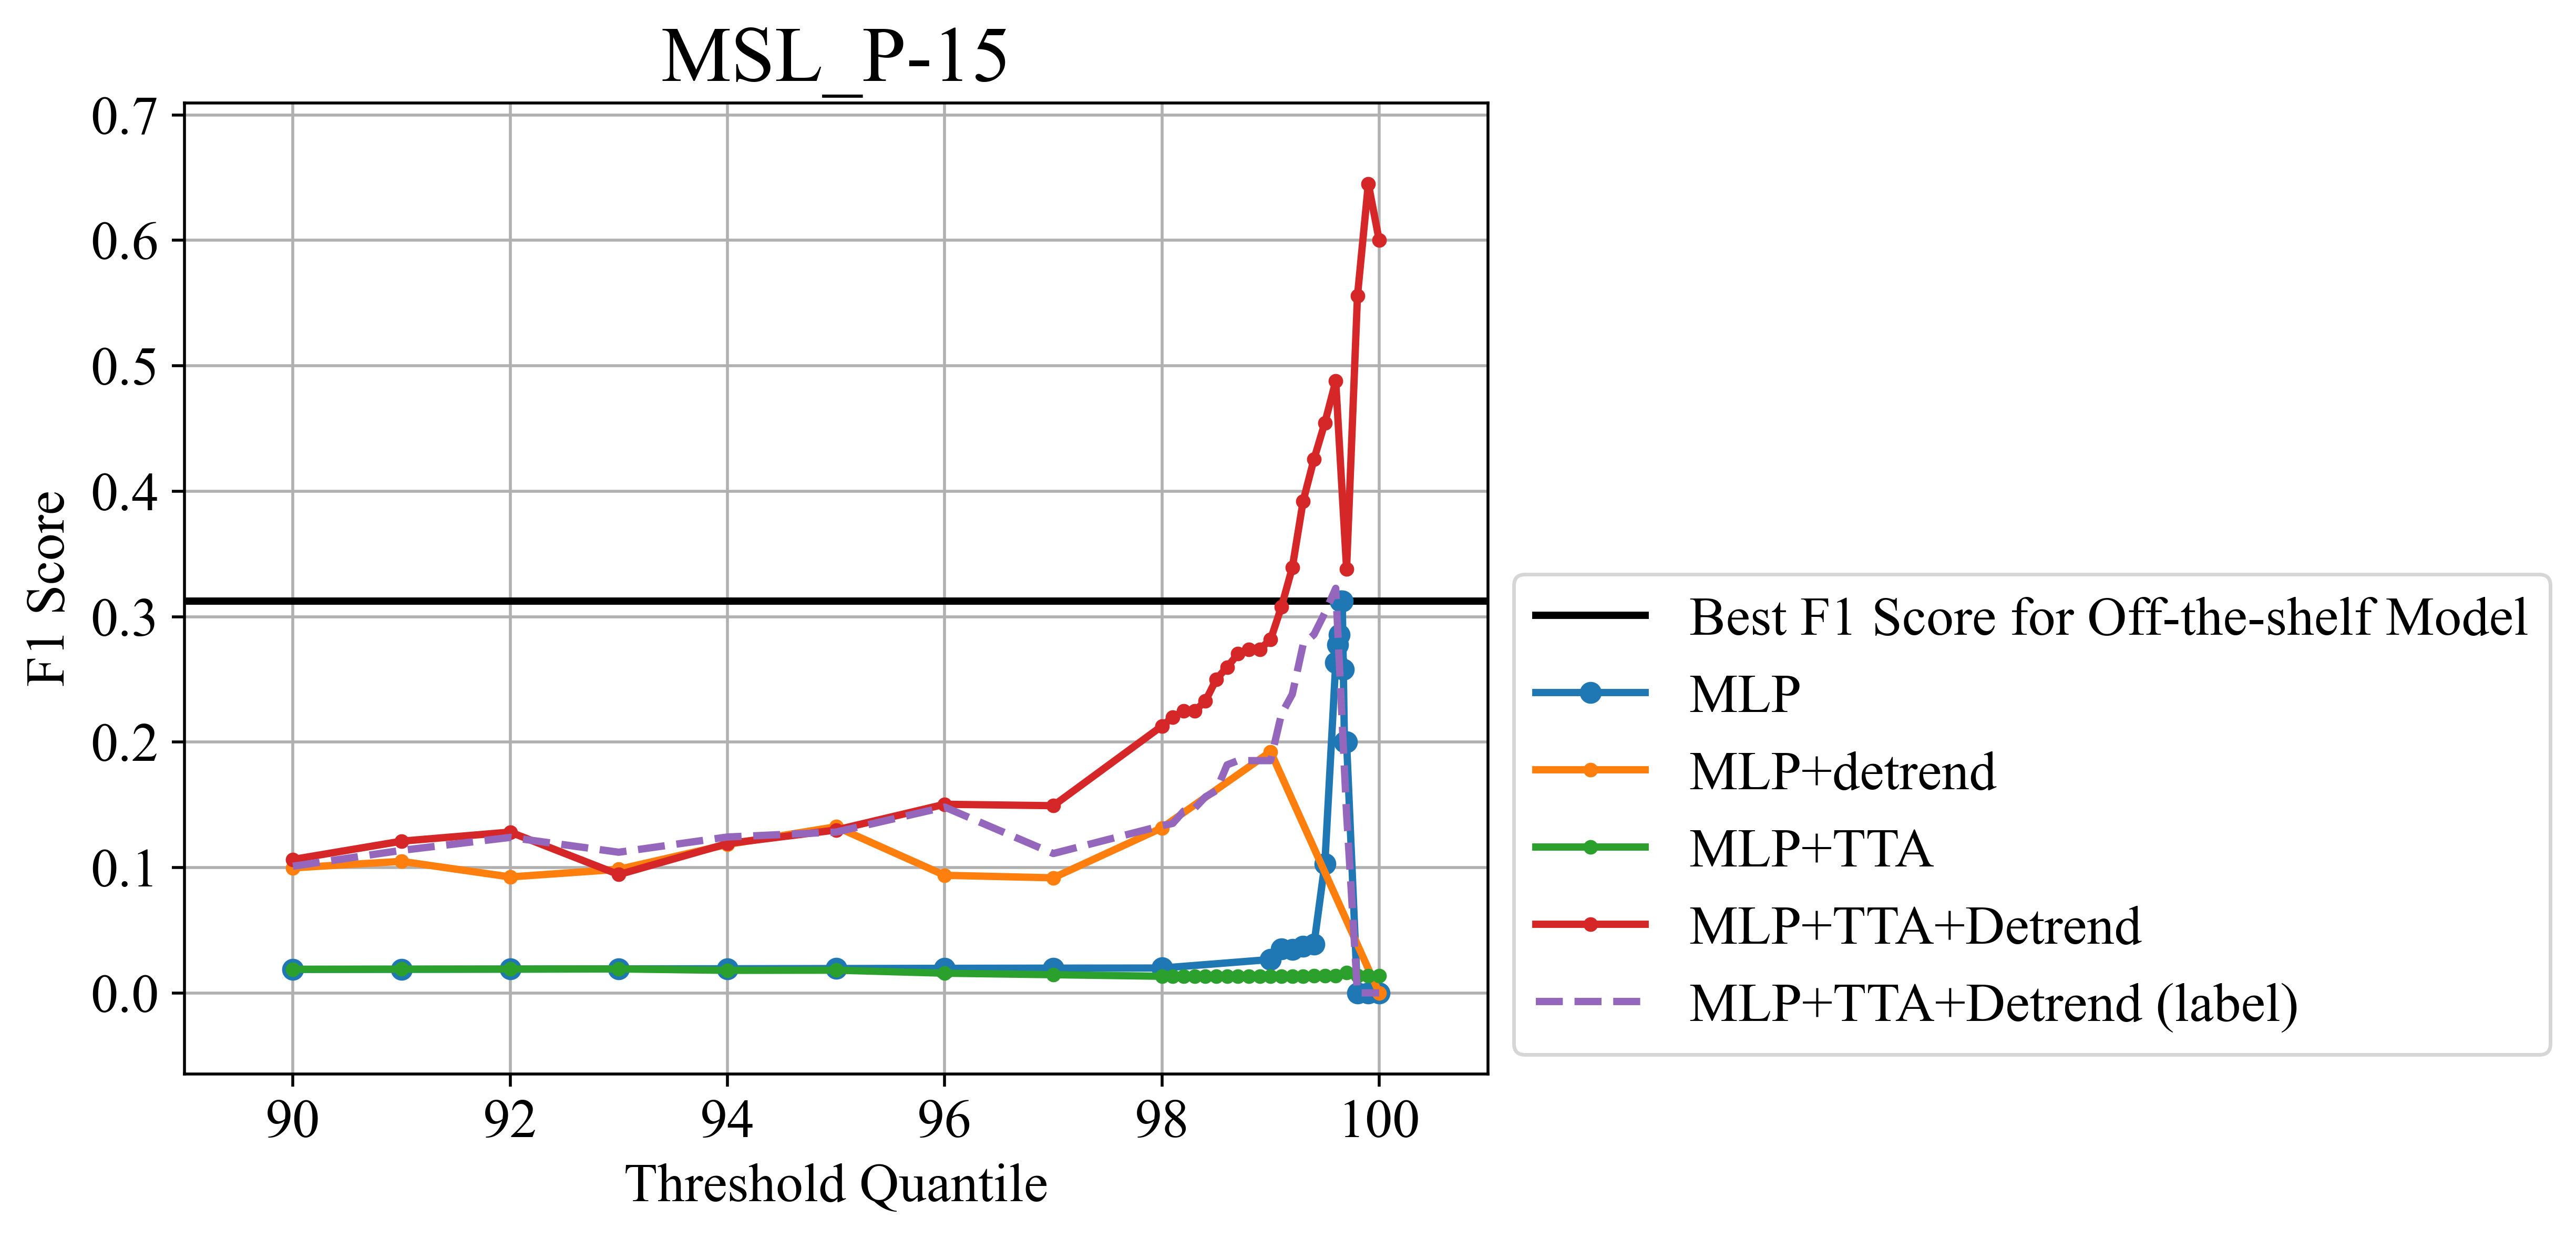

results\MLP_SMAP_D-13_normalization_None | offline_all_0
MLP_SMAP_D-13_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_None | offline_all_0
MLP_SMAP_D-13_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_Detrend | offline_detrend_all_0
MLP_SMAP_D-13_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_Detrend | offline_detrend_all_0
MLP_SMAP_D-13_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_None | None_online_all_0
MLP_SMAP_D-13_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_None | None_online_all_0
MLP_SMAP_D-13_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_Detrend | Detrend_online_all_0
MLP_SMAP_D-13_normalization_Detrend_online_all_0.9_1.0_0.01.csv
results\MLP_SMAP_D-13_normalization_Detrend | Detrend_online_all_0
MLP_SMAP_D-13_normalization_Detrend_on

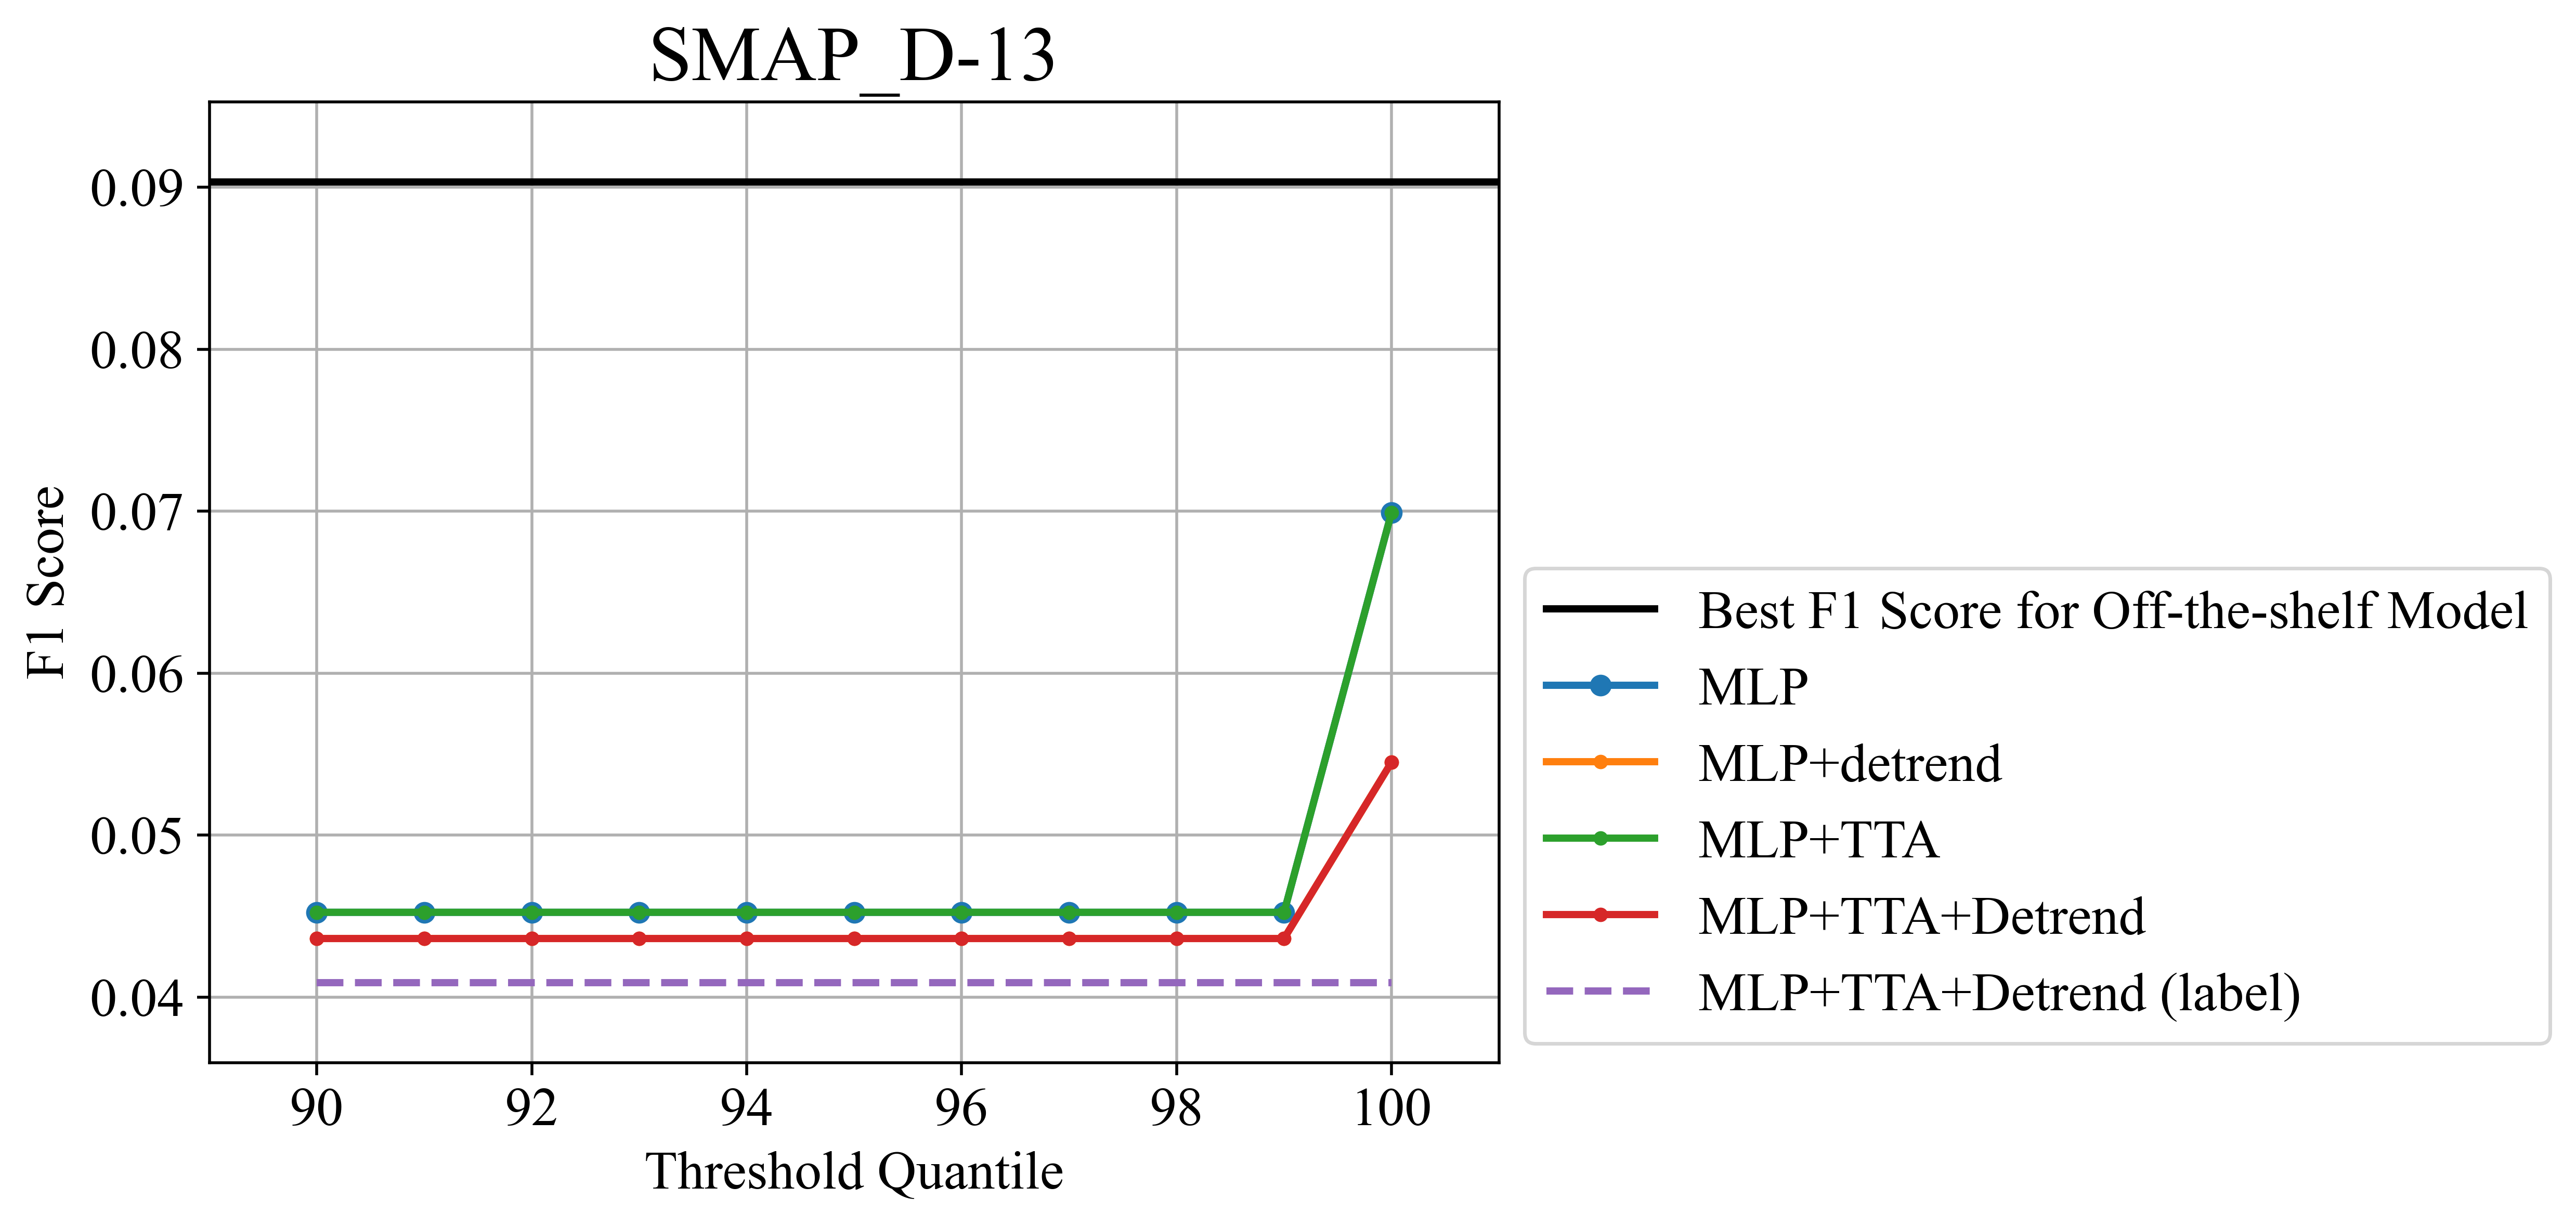

results\MLP_SMAP_T-3_normalization_None | offline_all_0
MLP_SMAP_T-3_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_None | offline_all_0
MLP_SMAP_T-3_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_Detrend | offline_detrend_all_0
MLP_SMAP_T-3_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_Detrend | offline_detrend_all_0
MLP_SMAP_T-3_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_None | None_online_all_0
MLP_SMAP_T-3_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_None | None_online_all_0
MLP_SMAP_T-3_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_Detrend | Detrend_online_all_0
MLP_SMAP_T-3_normalization_Detrend_online_all_0.9_1.0_0.01.csv
results\MLP_SMAP_T-3_normalization_Detrend | Detrend_online_all_0
MLP_SMAP_T-3_normalization_Detrend_online_all_0.9_1.0

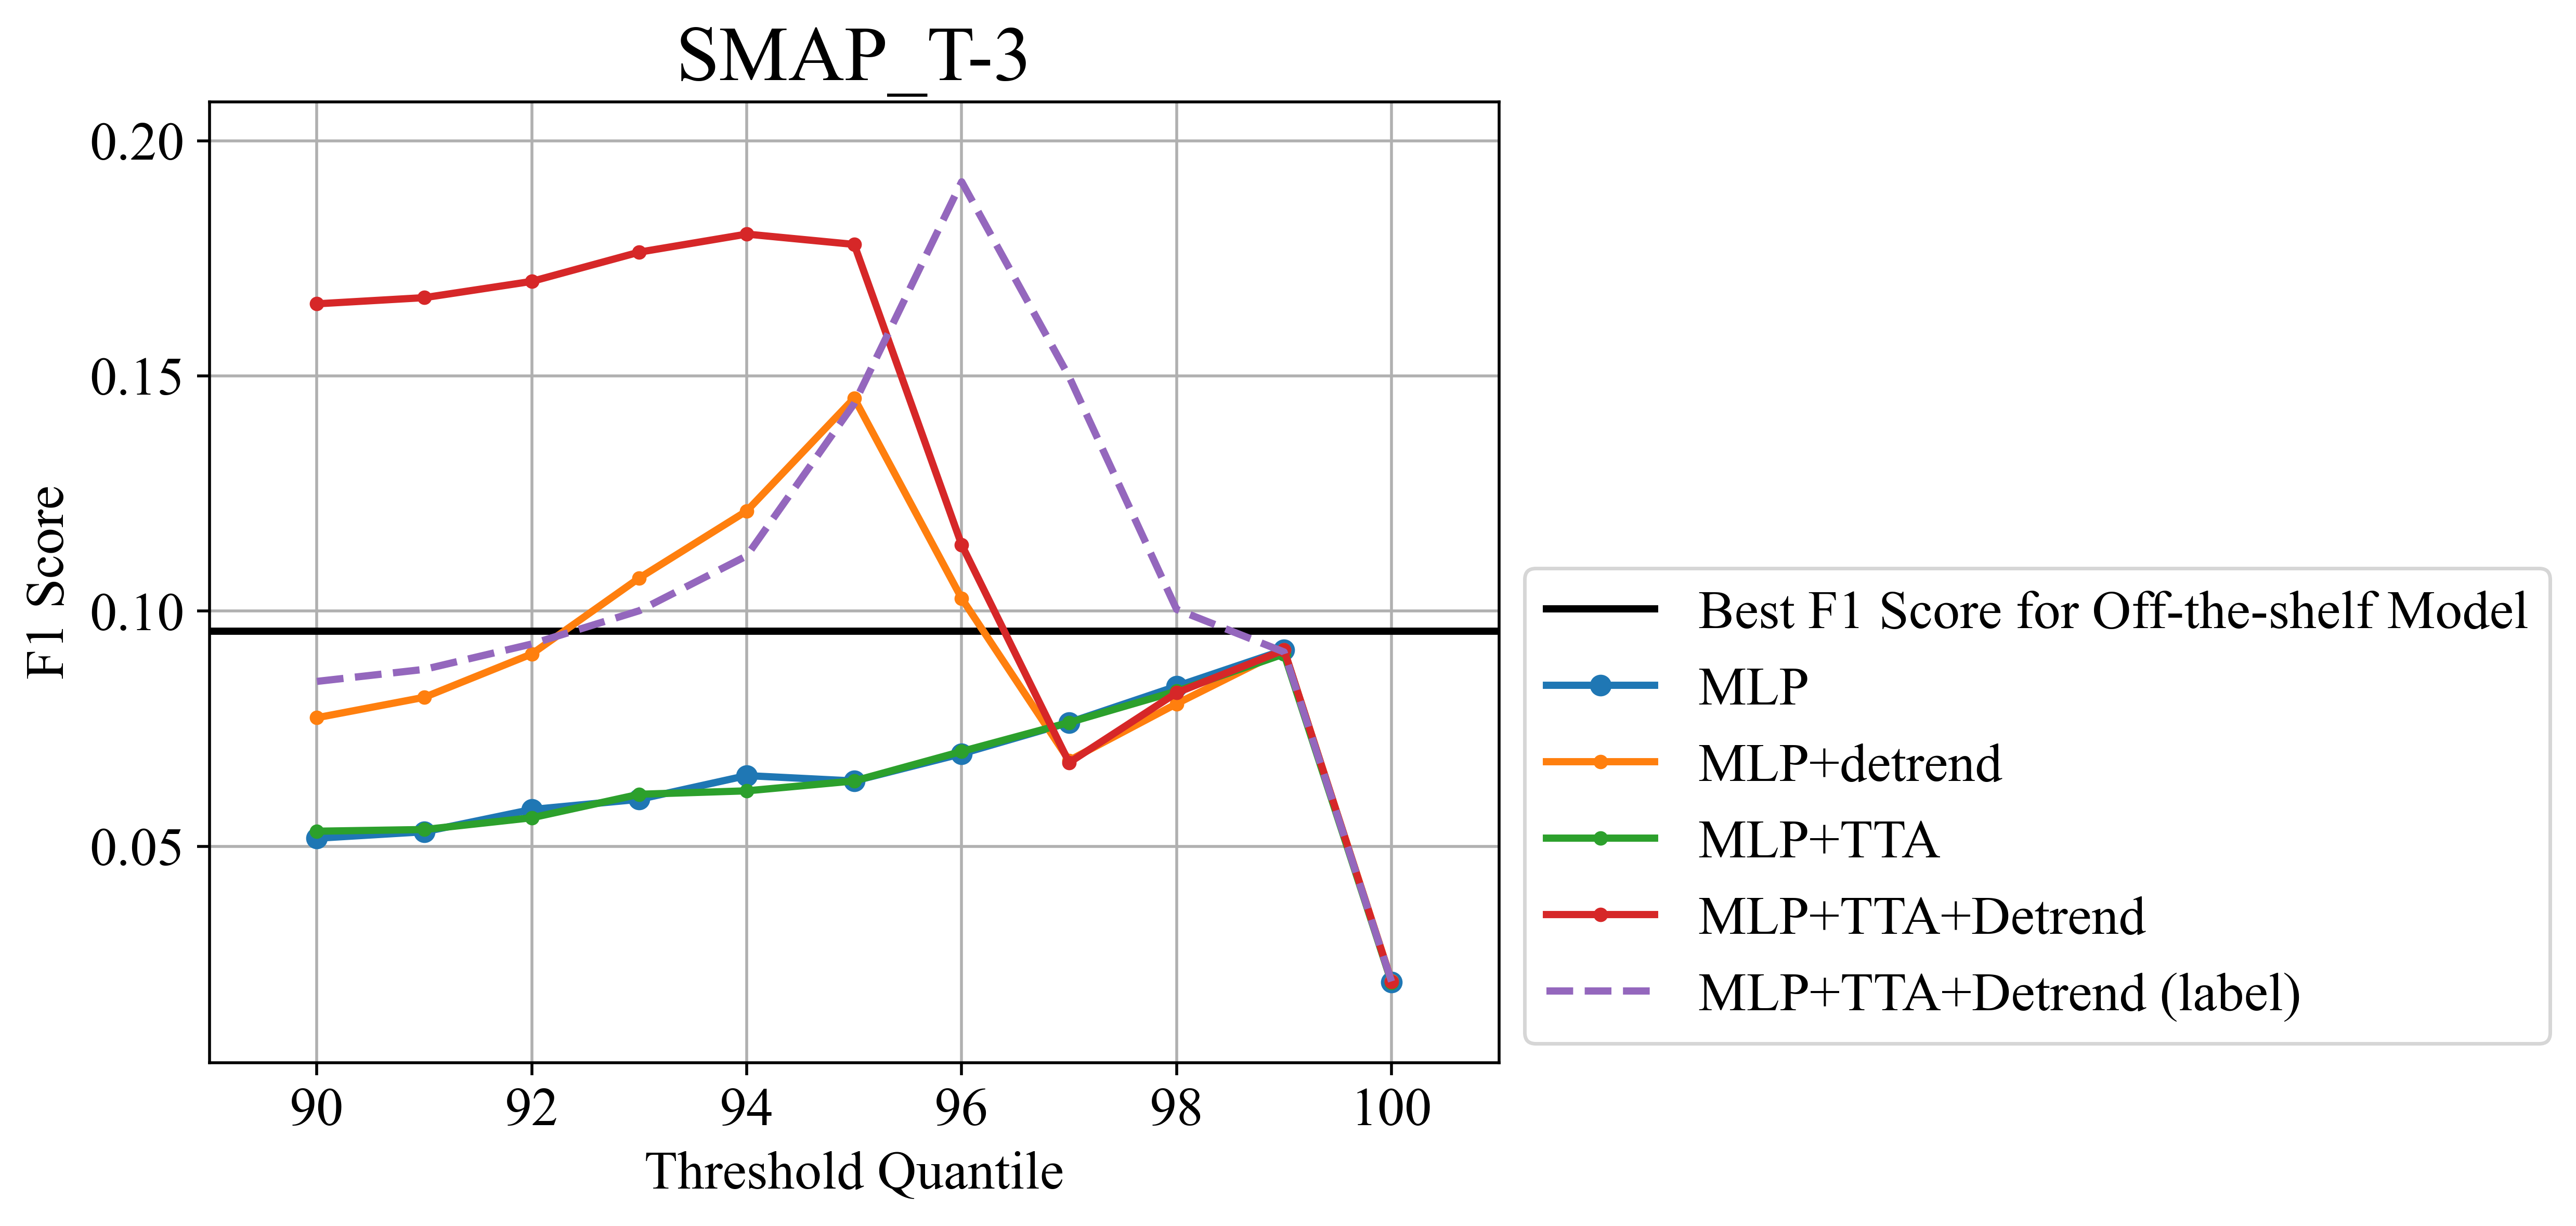

results\MLP_yahoo_20_normalization_None | offline_all_0
MLP_yahoo_20_normalization_None_offline_all_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_None | offline_all_0
MLP_yahoo_20_normalization_None_offline_all_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_Detrend | offline_detrend_all_0
MLP_yahoo_20_normalization_Detrend_offline_detrend_all_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_Detrend | offline_detrend_all_0
MLP_yahoo_20_normalization_Detrend_offline_detrend_all_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_None | None_online_all_0
MLP_yahoo_20_normalization_None_online_all_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_None | 

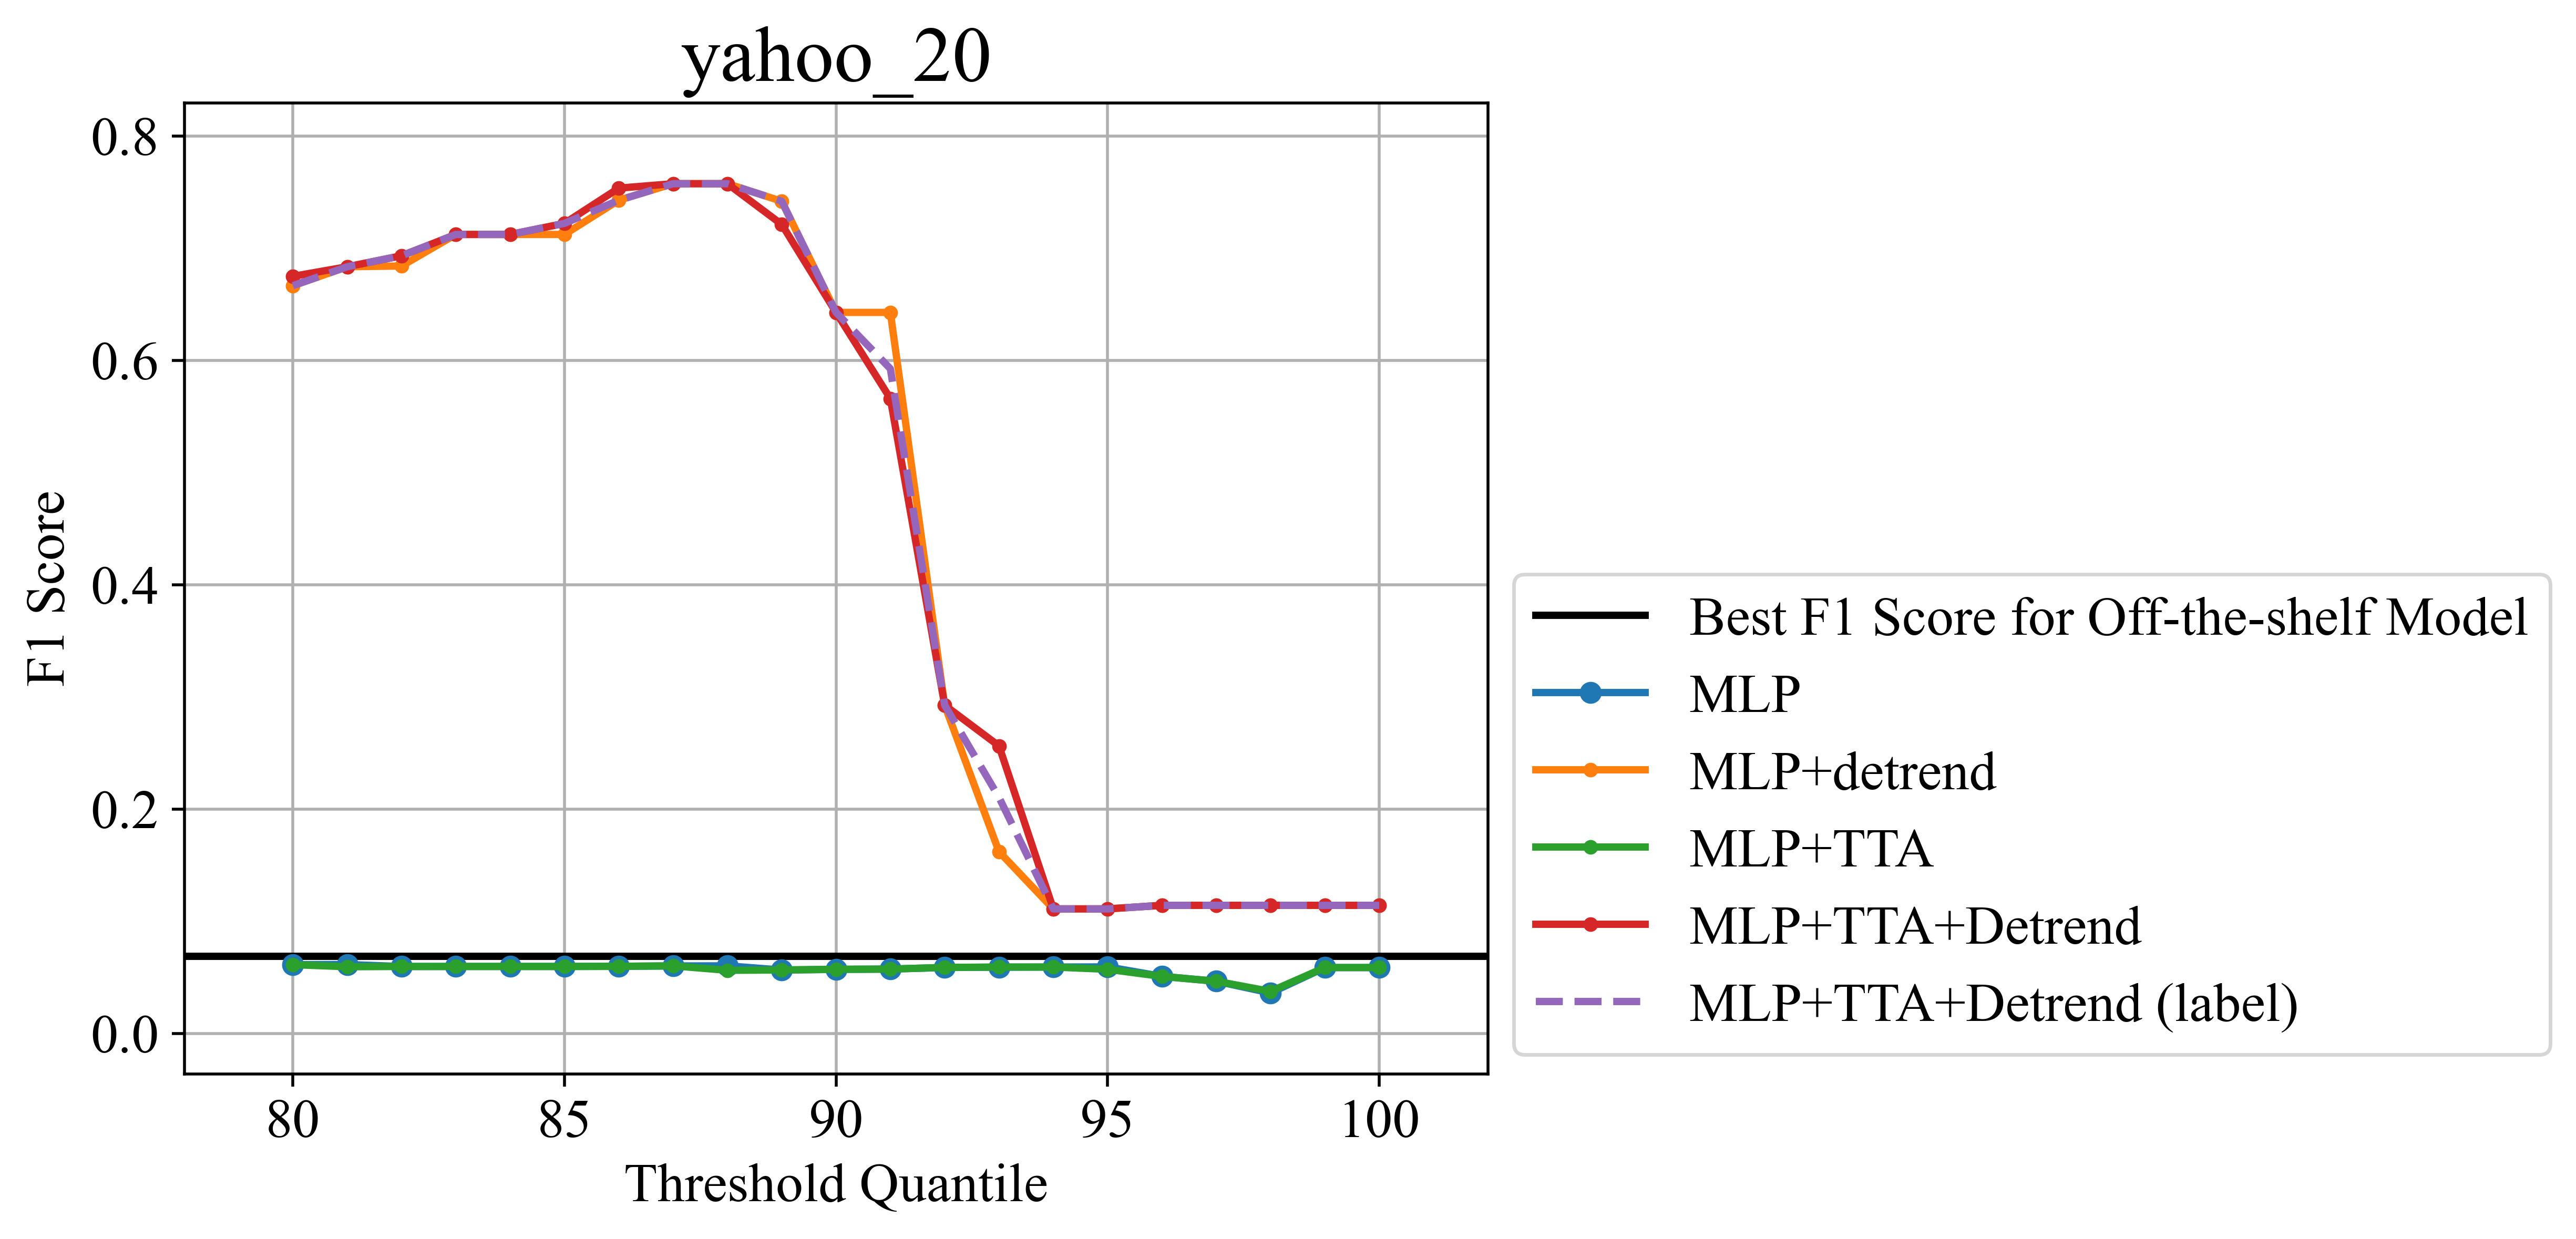

results\MLP_yahoo_55_normalization_None | offline_all_0
MLP_yahoo_55_normalization_None_offline_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_None | offline_all_0
MLP_yahoo_55_normalization_None_offline_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_Detrend | offline_detrend_all_0
MLP_yahoo_55_normalization_Detrend_offline_detrend_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_Detrend | offline_detrend_all_0
MLP_yahoo_55_normalization_Detrend_offline_detrend_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_None | None_online_all_0
MLP_yahoo_55_normalization_None_online_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_None | None_online_all_0
MLP_yahoo_55_normalization_None_online_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_Detrend | Detrend_online_all_0
MLP_yahoo_55_normalization_Detrend_online_all_0.8_1.0_0.01.csv
results\MLP_yahoo_55_normalization_Detrend | Detrend_online_all_0
MLP_yahoo_55_normalization_Detrend_online_all_0.8_1.0

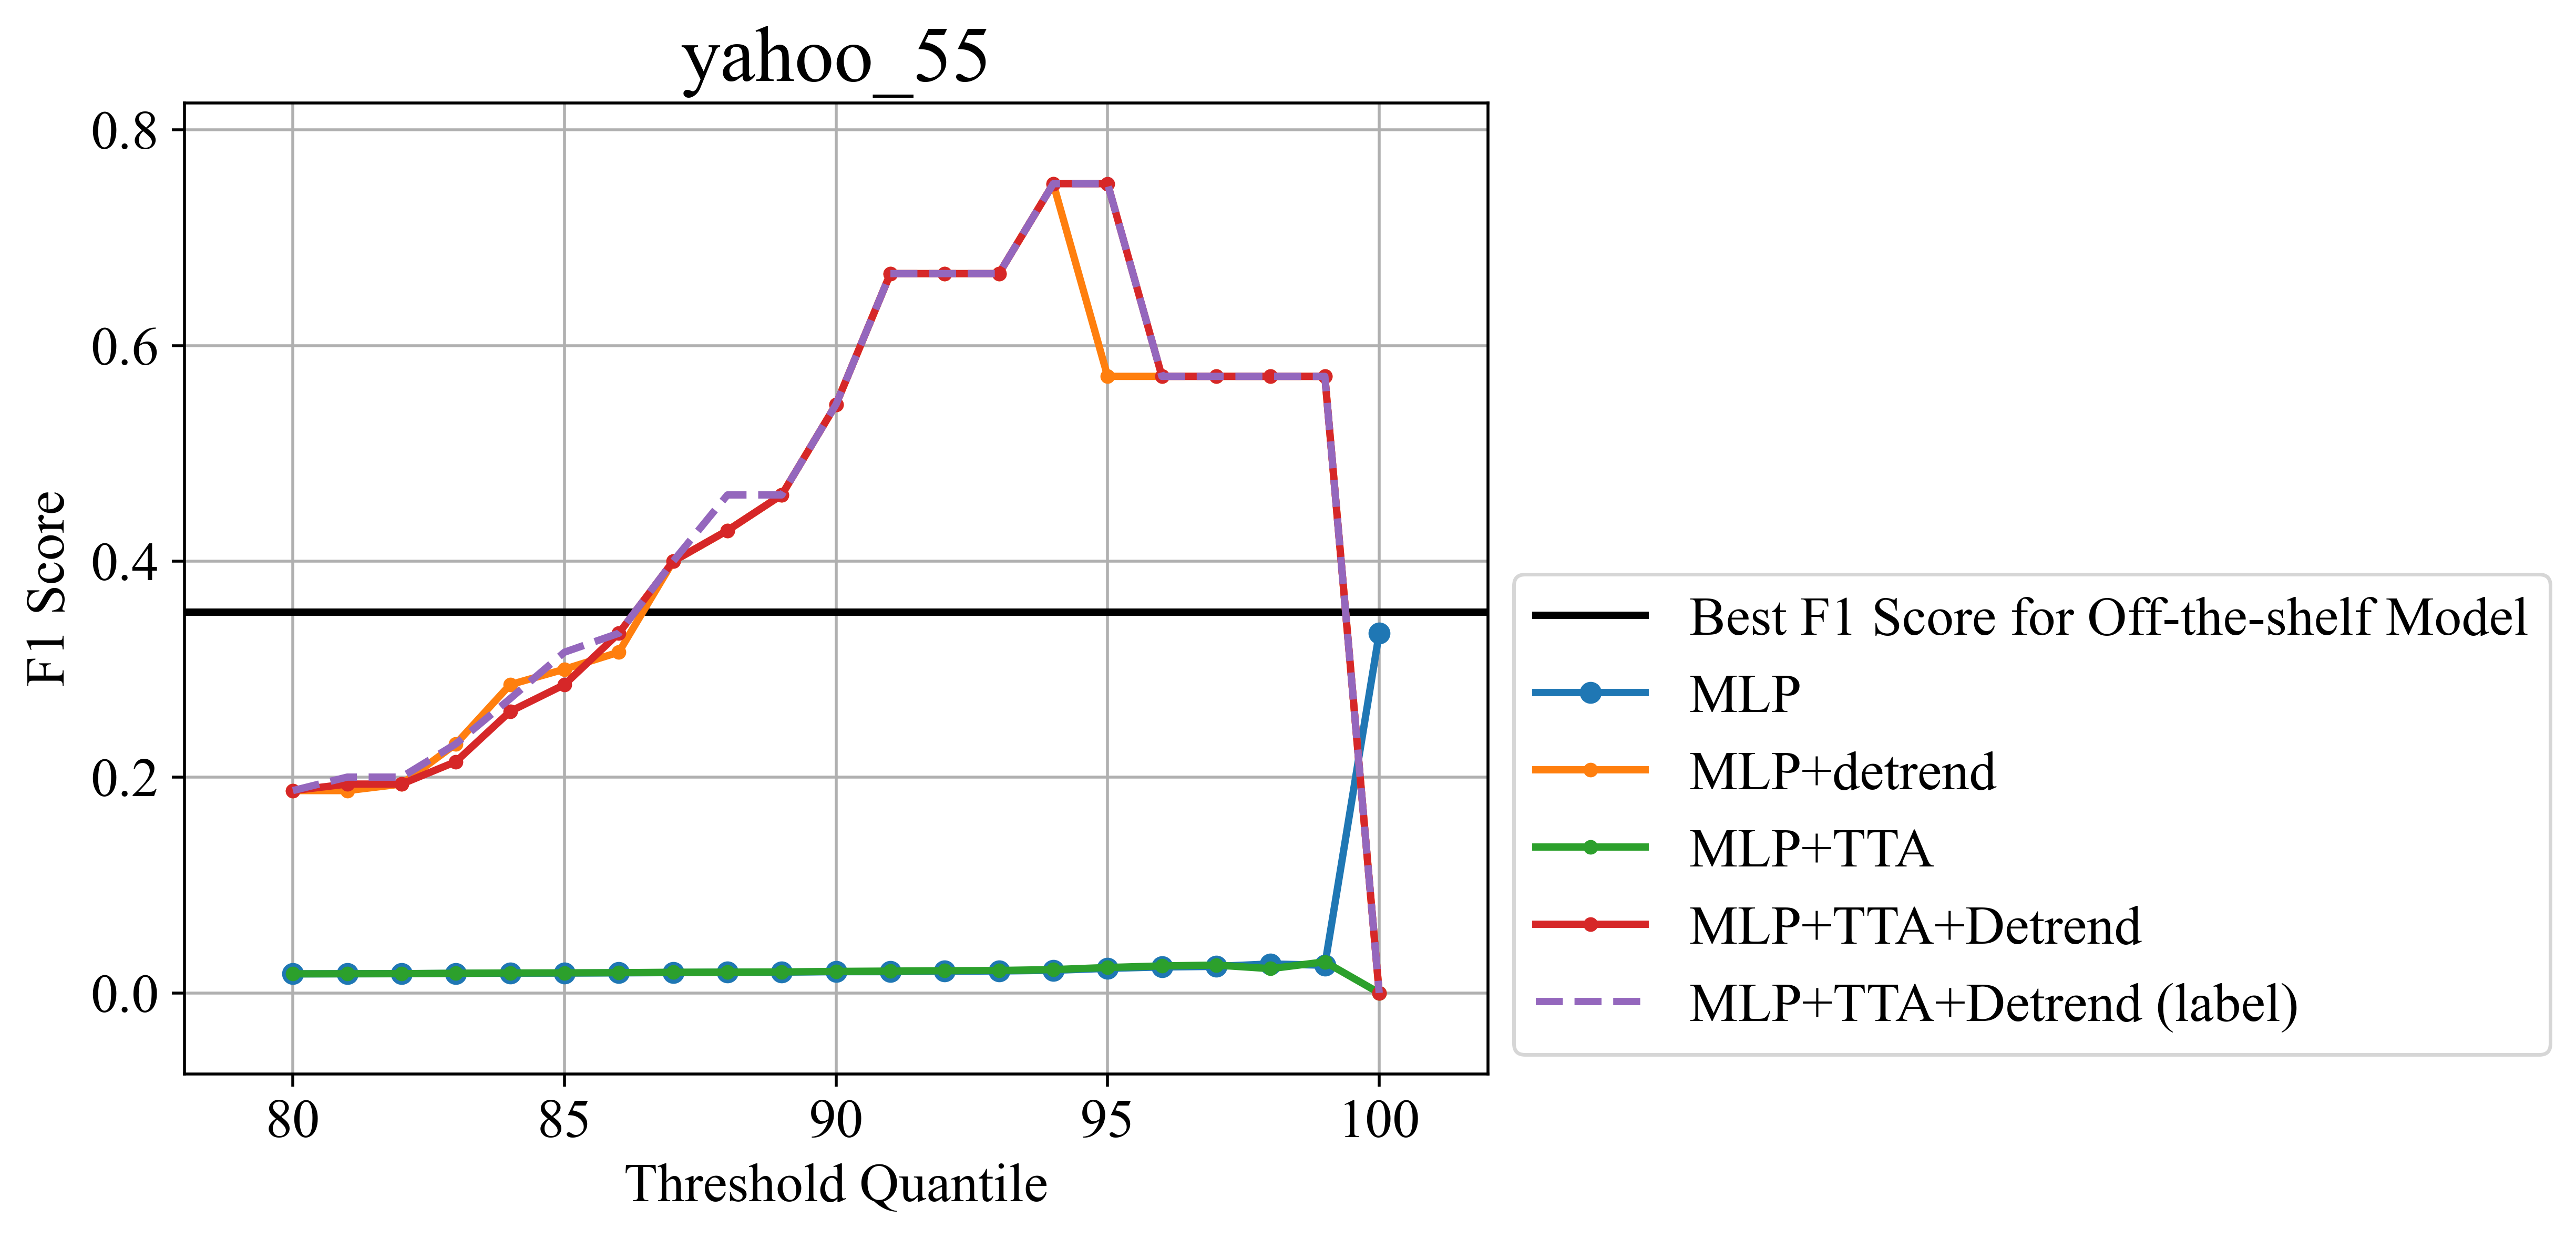

results\MLP_CreditCard_normalization_None | offline_all_0
MLP_CreditCard_normalization_None_offline_all_0.999_1.0_0.0001.csv
MLP_CreditCard_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_None | offline_all_0
MLP_CreditCard_normalization_None_offline_all_0.999_1.0_0.0001.csv
MLP_CreditCard_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_Detrend | offline_detrend_all_0
MLP_CreditCard_normalization_Detrend_offline_detrend_all_0.999_1.0_0.0001.csv
MLP_CreditCard_normalization_Detrend_offline_detrend_all_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_Detrend | offline_detrend_all_0
MLP_CreditCard_normalization_Detrend_offline_detrend_all_0.999_1.0_0.0001.csv
MLP_CreditCard_normalization_Detrend_offline_detre

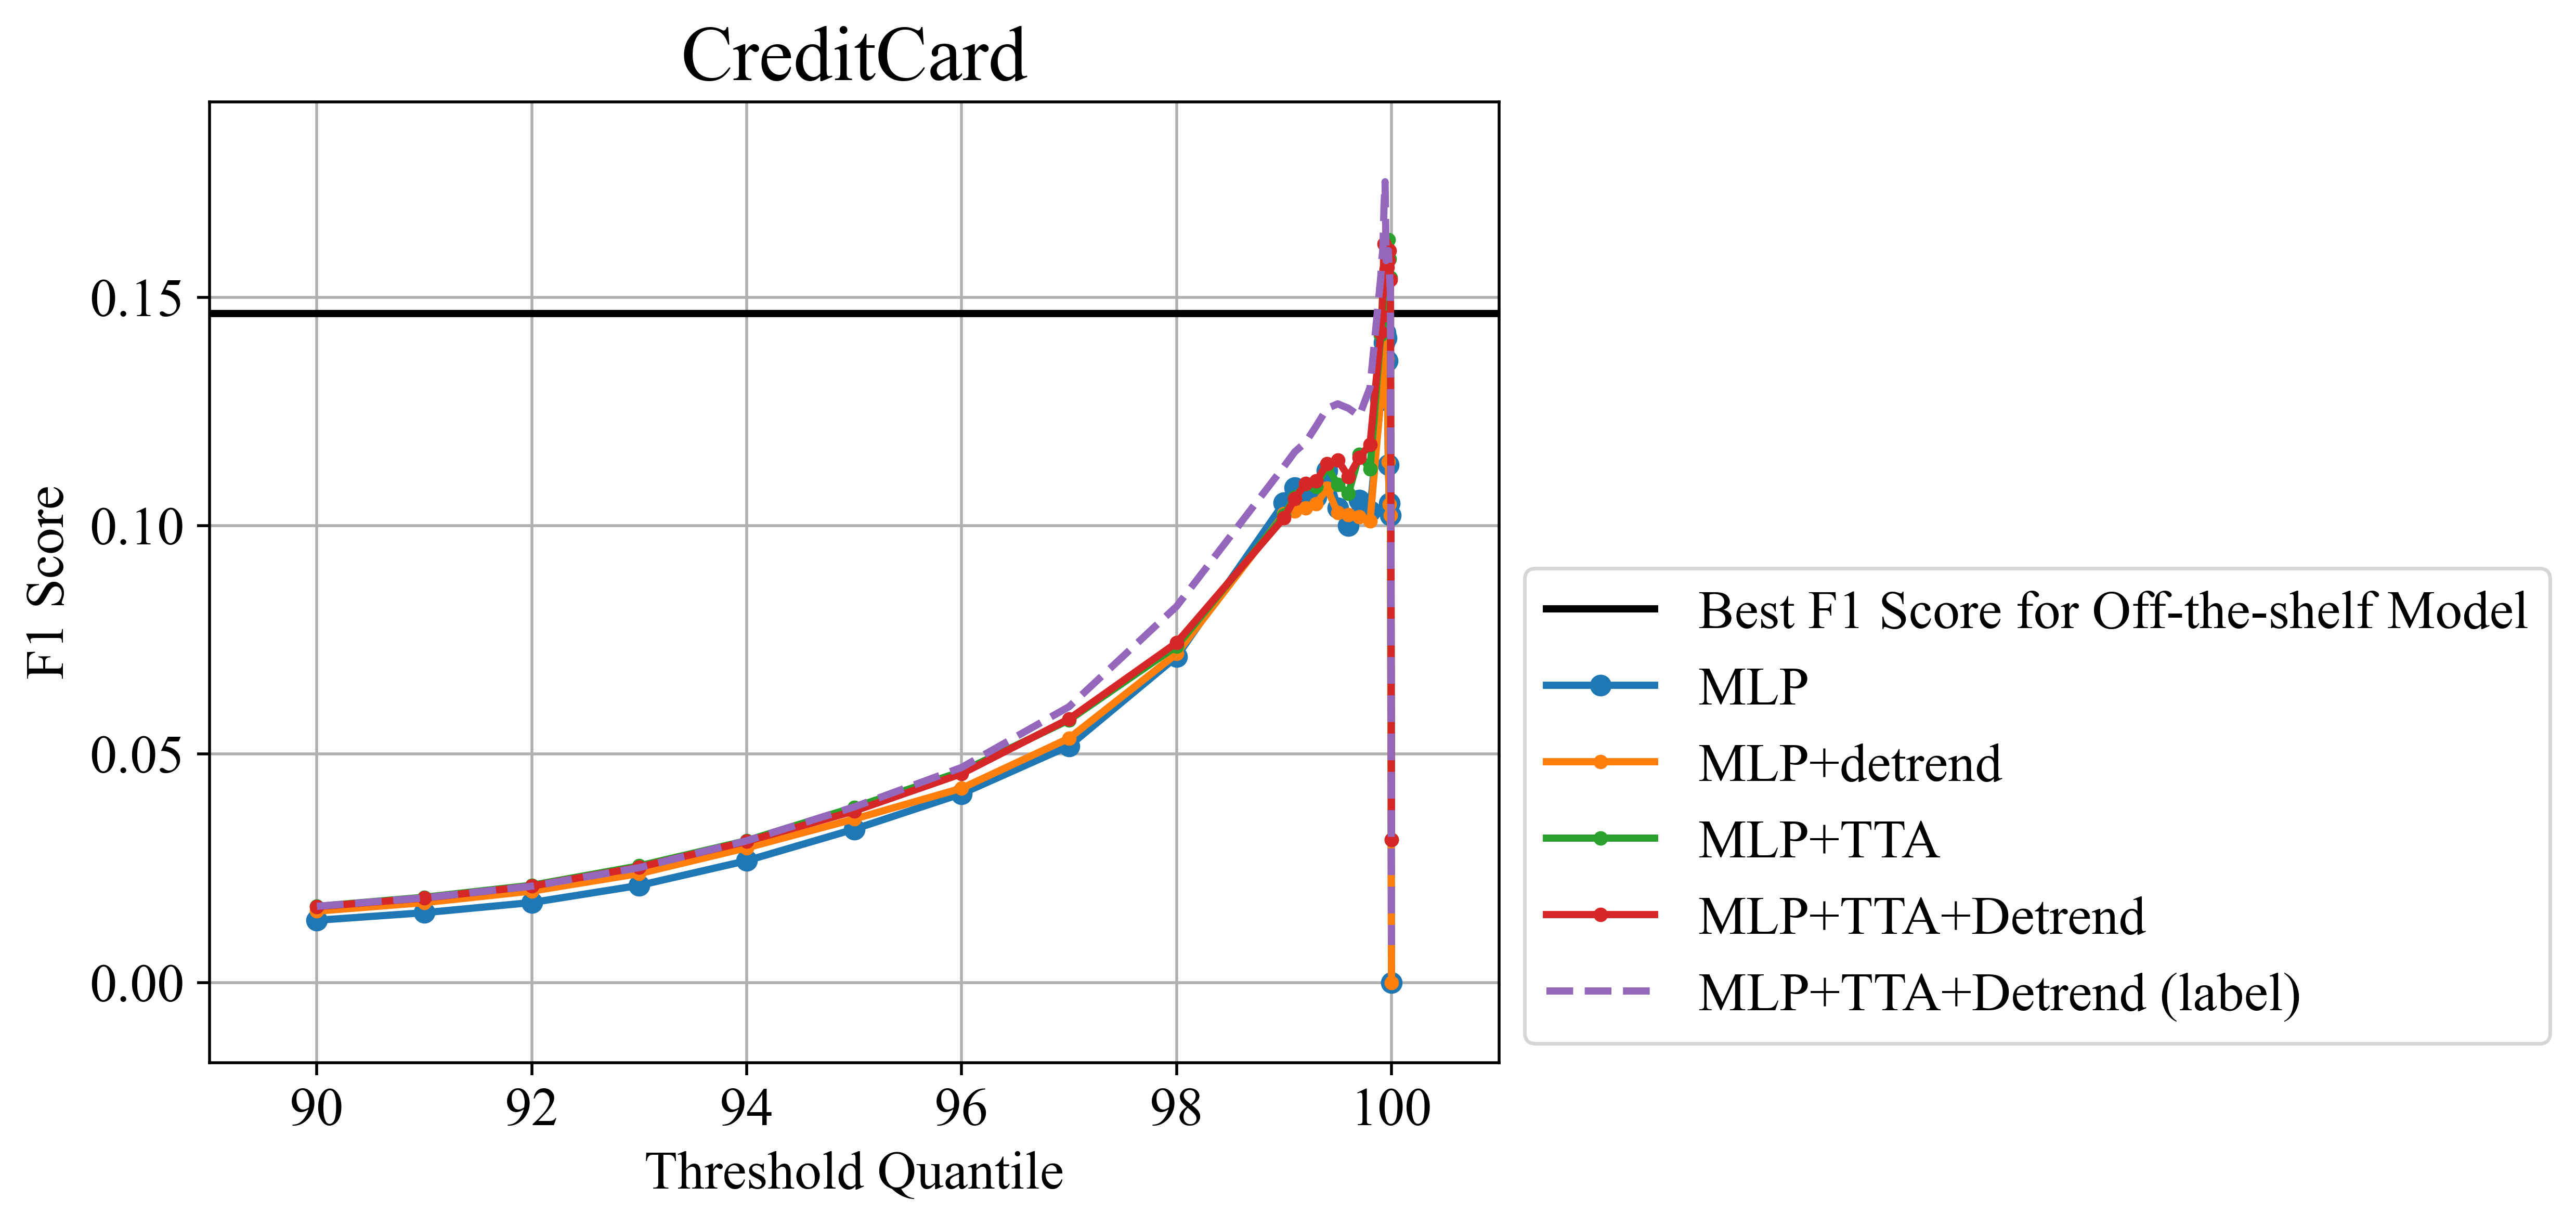

results\MLP_WADI_normalization_None | offline_all_0
MLP_WADI_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_WADI_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_None | offline_all_0
MLP_WADI_normalization_None_offline_all_0.99_1.0_0.001.csv
MLP_WADI_normalization_None_offline_all_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_Detrend | offline_detrend_all_0
MLP_WADI_normalization_Detrend_offline_detrend_all_0.99_1.0_0.001.csv
MLP_WADI_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_Detrend | offline_detrend_all_0
MLP_WADI_normalization_Detrend_offline_detrend_all_0.99_1.0_0.001.csv
MLP_WADI_normalization_Detrend_offline_detrend_all_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_None | None_online_all_0
MLP_WADI_normalization_None_online_all_0.99_1.0_0.001.csv
MLP_WADI_normalization_None_online_all_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_None | None_online_all_0
MLP_WADI_normalization_None_online_a

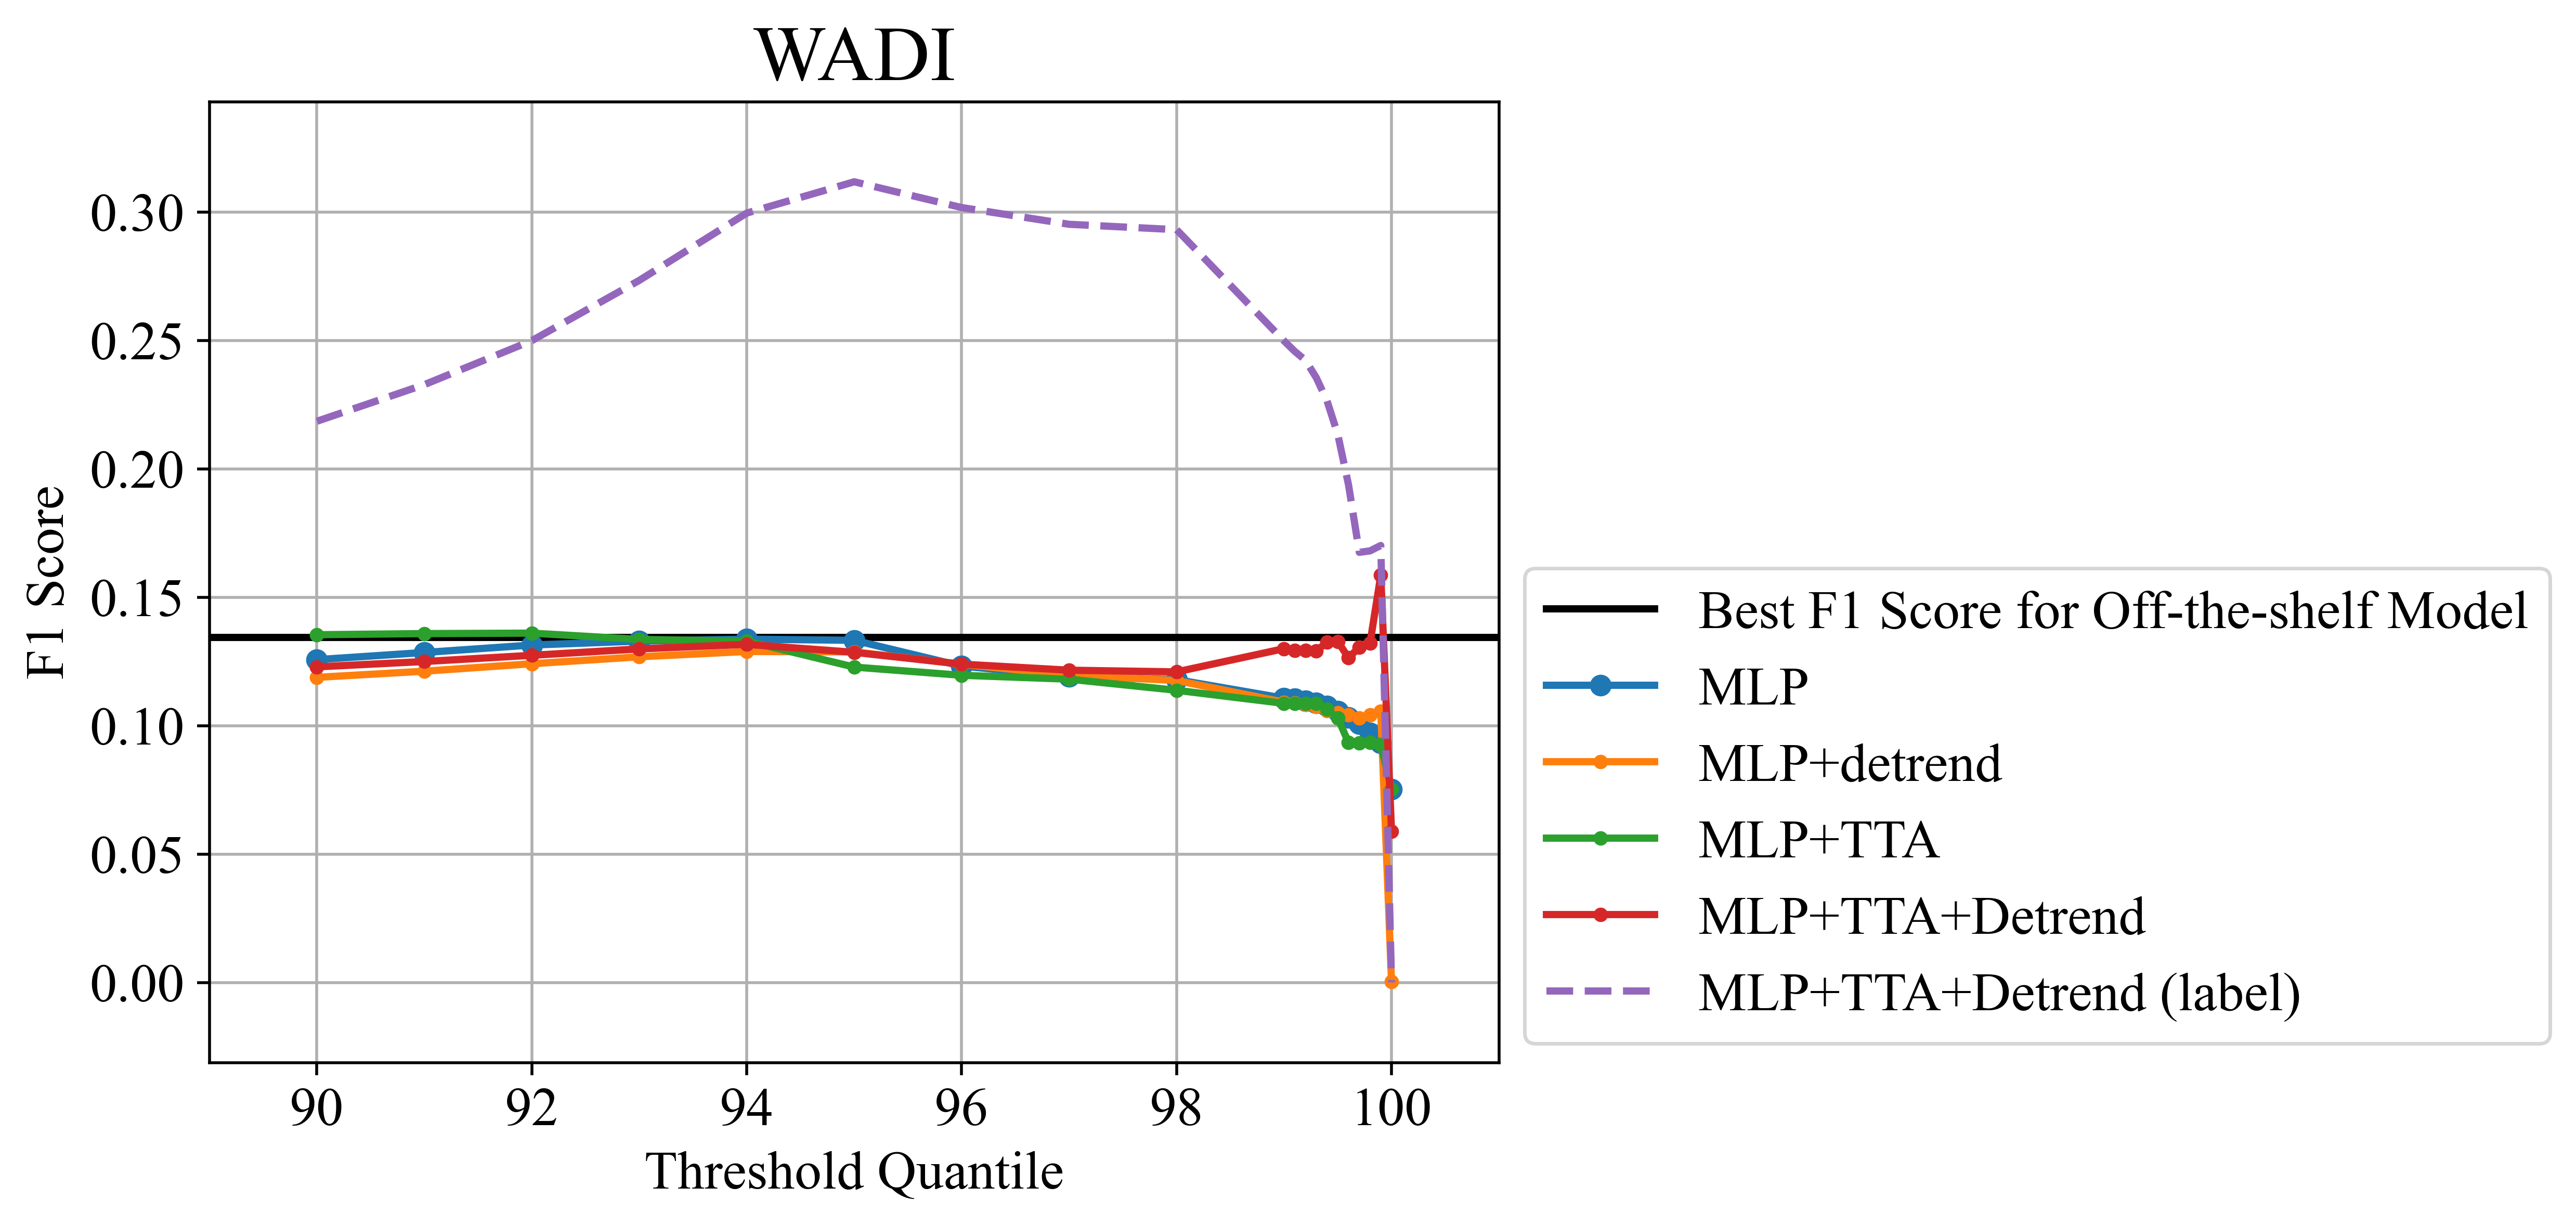

In [14]:
model = "MLP"

data = ["SWaT", "SMD_machine-1-4", "MSL_P-15", "SMAP_D-13", "SMAP_T-3", "yahoo_20", "yahoo_55", "CreditCard", "WADI"]

ms = 3
for d in data:
    plt.title(f"{d}")
    
    plt.xlabel("Threshold Quantile")
    plt.ylabel("F1 Score")
    
    # qBest
    
    try:
        path = os.path.join("results", f"MLP_{d}_normalization_None")
        df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), index_col=0)
        qBest = df[df.index=="Q_off_f1_best"]["F1"].values[0]
        plt.axhline(qBest, color="black", label="Best F1 Score for Off-the-shelf Model")
    except:
        pass
    
    # offline
    try:
        savedf(os.path.join("results", f"MLP_{d}_normalization_None"), "offline_all_0")
        q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_None"), "offline_all_0")
        plt.plot(q, f1, '-o', label=f"{model}", markersize=ms+2)
    except:
        pass
    
    # offline+SlowRevIN
    try:
        savedf(os.path.join("results", f"MLP_{d}_normalization_Detrend"), "offline_detrend_all_0")
        q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_Detrend"), "offline_detrend_all_0")
        plt.plot(q, f1, '-o', label=f"{model}+detrend", markersize=ms)
    except:
        pass
    
    # online
    try:
        savedf(os.path.join("results", f"MLP_{d}_normalization_None"), "None_online_all_0")
        q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_None"), "None_online_all_0")
        plt.plot(q, f1, '-o', label=f"{model}+TTA", markersize=ms)
    except:
        pass
    
    # online+SlowRevIN
    try:
        savedf(os.path.join("results", f"MLP_{d}_normalization_Detrend"), "Detrend_online_all_0")
        q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_Detrend"), "Detrend_online_all_0")
        plt.plot(q, f1, '-o', label=f"{model}+TTA+Detrend", markersize=ms)
    except:
        pass
    
    # online+SlowRevIN+Label
    try:
        savedf(os.path.join("results", f"MLP_{d}_normalization_Detrend"), "Detrend_online_label_all_0")
        q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_Detrend"), "Detrend_online_label_all_0")
        plt.plot(q, f1, '--', label=f"{model}+TTA+Detrend (label)", markersize=ms)
    except:
        pass
    
    
    plt.legend(loc=(1.02, 0.02))
    plt.show()